In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#load the dataset
dd=pd.read_excel('telcom_data.xlsx')
dd

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [3]:
dd.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
dd.shape

(150001, 55)

In [6]:
dd.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [7]:
len(dd['Dur. (ms)'])

150001

In [10]:
dd1={"Bearer Id":dd["Bearer Id"],'MSISDN/Number':dd['MSISDN/Number'],'Start ms':dd['Start ms'],'End ms':dd['End ms'],'Dur. (ms)':dd['Dur. (ms)'],
   'Dur. (ms)':dd['Dur. (ms)'],'Avg RTT DL (ms)':dd['Avg RTT DL (ms)'],'Avg RTT UL (ms)':dd['Avg RTT UL (ms)'],
   'Activity Duration DL (ms)':dd['Activity Duration DL (ms)'],
   'Activity Duration UL (ms)':dd['Activity Duration UL (ms)'],}

In [11]:
B=pd.DataFrame(dd1)

In [12]:
B

,Bearer Id,MSISDN/Number,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Activity Duration DL (ms),Activity Duration UL (ms)
0,13114483460844900352,3.366496e+10,770.0,662.0,1823652.0,42.0,5.0,37624.0,38787.0
1,13114483482878900224,3.368185e+10,235.0,606.0,1365104.0,65.0,5.0,168.0,3560.0
2,13114483484080500736,3.376063e+10,1.0,652.0,1361762.0,NaN,NaN,0.0,0.0
3,13114483485442799616,3.375034e+10,486.0,171.0,1321509.0,NaN,NaN,3330.0,37882.0
4,13114483499480700928,3.369980e+10,565.0,954.0,1089009.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,3.365069e+10,451.0,214.0,81230.0,32.0,0.0,42376.0,41915.0
149997,7349883264234609664,3.366345e+10,483.0,187.0,97970.0,27.0,2.0,17264.0,16759.0
149998,13114483573367300096,3.362189e+10,283.0,810.0,98249.0,43.0,6.0,25003.0,28640.0
149999,13114483573367300096,3.361962e+10,696.0,327.0,97910.0,37.0,5.0,13405.0,34088.0


In [13]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Bearer Id                  150001 non-null  object 
 1   MSISDN/Number              148935 non-null  float64
 2   Start ms                   150000 non-null  float64
 3   End ms                     150000 non-null  float64
 4   Dur. (ms)                  150000 non-null  float64
 5   Avg RTT DL (ms)            122172 non-null  float64
 6   Avg RTT UL (ms)            122189 non-null  float64
 7   Activity Duration DL (ms)  150000 non-null  float64
 8   Activity Duration UL (ms)  150000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 10.3+ MB


# Checking Sessions Frequency

Session Frequency is nothing but number ofsessionsor connections set up by user or a device.

In [14]:
session_frequency = dd.groupby(by=['MSISDN/Number'])['Dur. (ms)'].transform('count')

In [15]:
len(session_frequency)

150001

#When due to data or count session freaquency increses the count decreases and vise versa.

# We will see in graphical representation how the session frequency will show

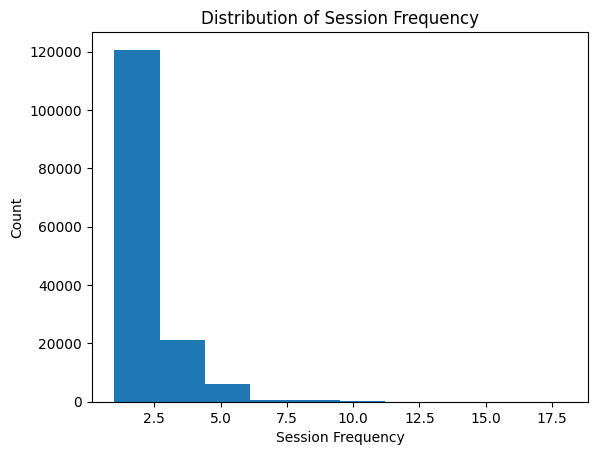

In [16]:
session_frequency.plot(kind='hist', bins=10)

plt.xlabel('Session Frequency')
plt.ylabel('Count')
plt.title('Distribution of Session Frequency')
plt.show()

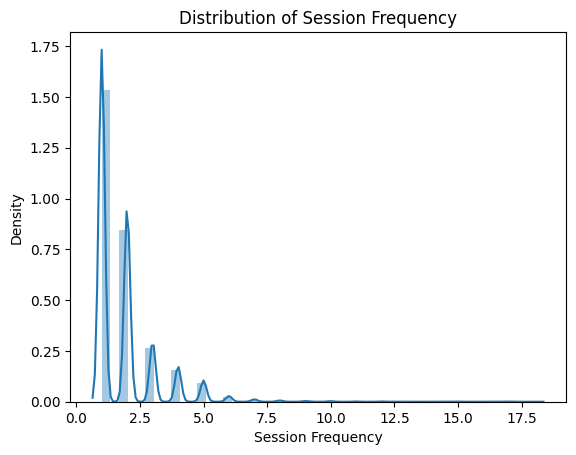

In [17]:
# Create a distribution plot using distplot
sns.distplot(session_frequency, kde=True)

plt.xlabel('Session Frequency')
plt.ylabel('Density')
plt.title('Distribution of Session Frequency')

plt.show()

### Based on Handset type & Manufacturer we will see the outcome of Session Frequency


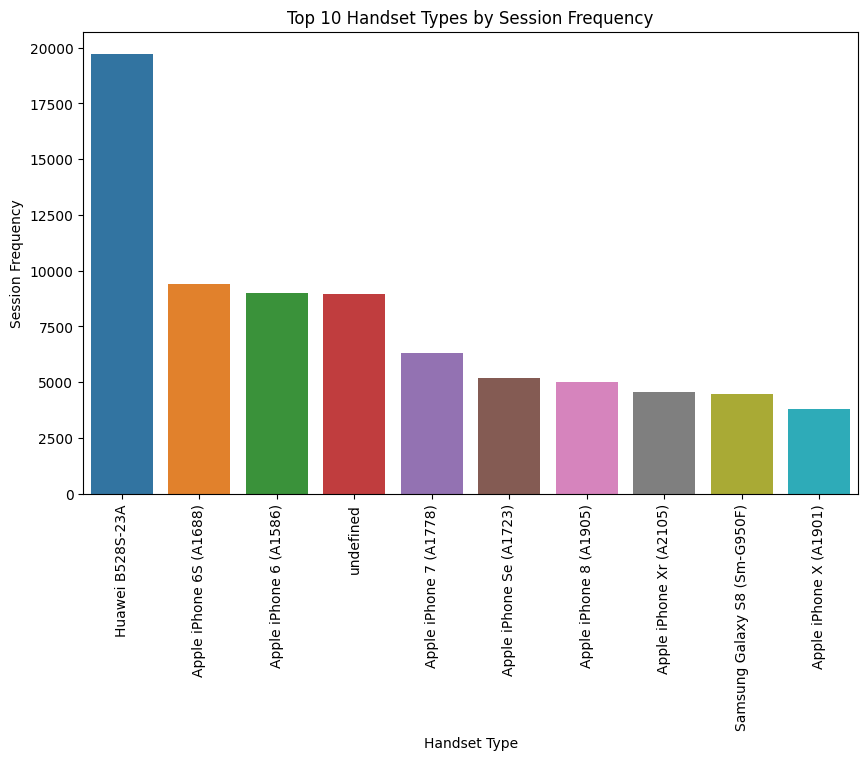

In [18]:
# Group the data by 'Handset Type' and 'MSISDN/Number' and count the number of unique sessions
session_f = dd.groupby(['Handset Type', 'MSISDN/Number'])['Dur. (ms)'].count().reset_index()

# Rename the column containing the session frequency count
session_f.rename(columns={'Dur. (ms)': 'Session F'}, inplace=True)

# Group the data by 'Handset Type' and calculate the total session frequency
type_frequency = session_f.groupby('Handset Type')['Session F'].sum().reset_index()

# Sort the data by session frequency in descending order
type_frequency = type_frequency.sort_values('Session F', ascending=False).head(10)

# Plot the session frequency by handset type
plt.figure(figsize=(10, 6))
sns.barplot(data=type_frequency, x='Handset Type', y='Session F')
plt.xlabel('Handset Type')
plt.ylabel('Session Frequency')
plt.title('Top 10 Handset Types by Session Frequency')
plt.xticks(rotation=90)
plt.show()

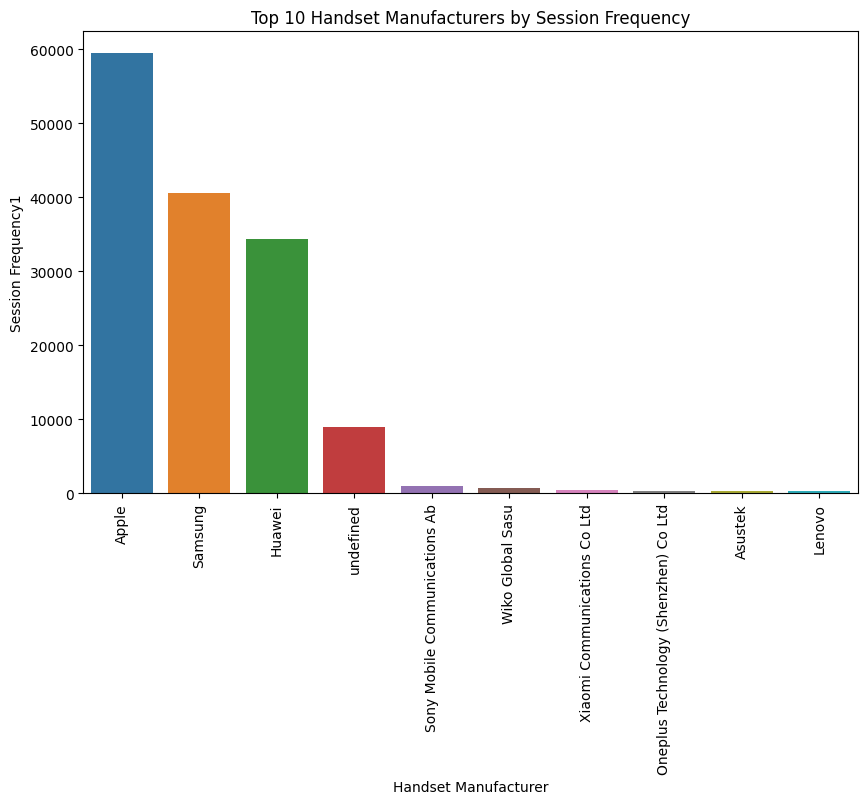

In [19]:
# Group the data by 'Handset Manufacturer' and 'MSISDN/Number' and count the number of unique sessions
session_frequency1 = dd.groupby(['Handset Manufacturer', 'MSISDN/Number'])['Dur. (ms)'].count().reset_index()

# Rename the column containing the session frequency count
session_frequency1.rename(columns={'Dur. (ms)': 'Session Frequency1'}, inplace=True)

# Group the data by 'Handset Manufacturer' and calculate the total session frequency
manufacturer_frequency = session_frequency1.groupby('Handset Manufacturer')['Session Frequency1'].sum().reset_index()

# Sort the data by session frequency in descending order
manufacturer_frequency = manufacturer_frequency.sort_values('Session Frequency1', ascending=False).head(10)

# Plot the session frequency by handset manufacturer
plt.figure(figsize=(10, 6))
sns.barplot(data=manufacturer_frequency, x='Handset Manufacturer', y='Session Frequency1')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Session Frequency1')
plt.title('Top 10 Handset Manufacturers by Session Frequency')
plt.xticks(rotation=90)
plt.show()


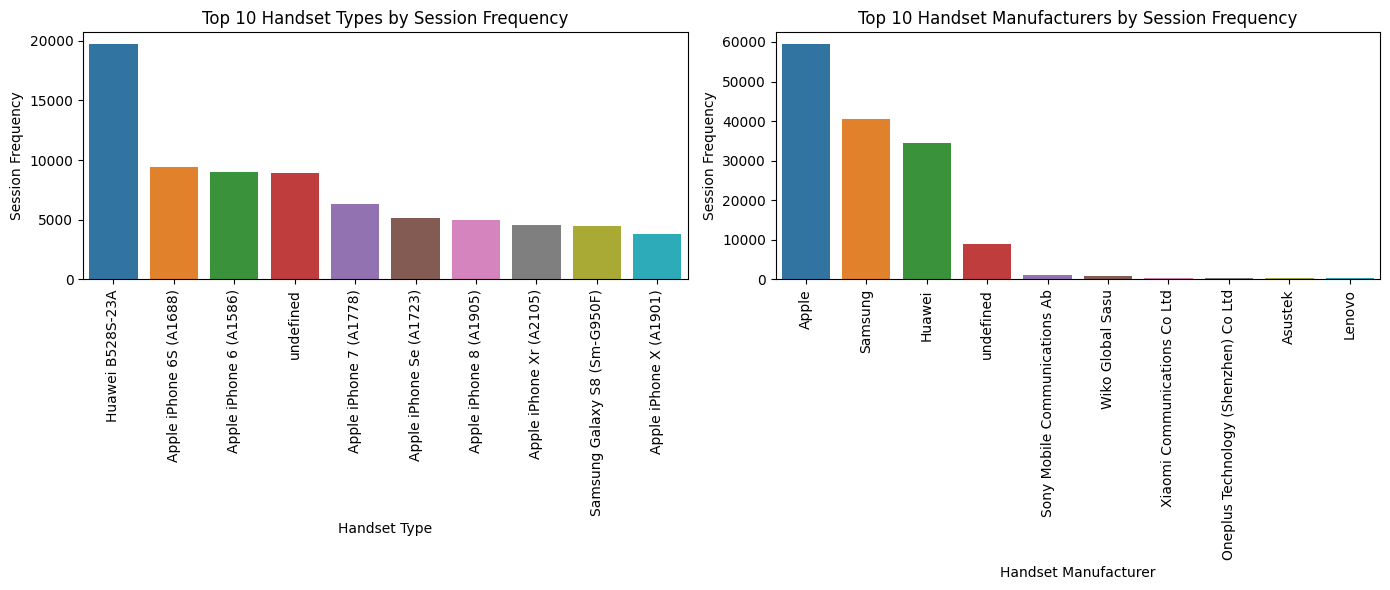

In [20]:
# Group the data by 'Handset Type' and 'MSISDN/Number' and count the number of unique sessions
session_frequency_type = dd.groupby(['Handset Type', 'MSISDN/Number'])['Dur. (ms)'].count().reset_index()

# Rename the column containing the session frequency count
session_frequency_type.rename(columns={'Dur. (ms)': 'Session F'}, inplace=True)

# Group the data by 'Handset Type' and calculate the total session frequency
type_frequency = session_frequency_type.groupby('Handset Type')['Session F'].sum().reset_index()

# Sort the data by session frequency in descending order
type_frequency = type_frequency.sort_values('Session F', ascending=False).head(10)

# Group the data by 'Handset Manufacturer' and 'MSISDN/Number' and count the number of unique sessions
session_frequency_manufacturer = dd.groupby(['Handset Manufacturer', 'MSISDN/Number'])['Dur. (ms)'].count().reset_index()

# Rename the column containing the session frequency count
session_frequency_manufacturer.rename(columns={'Dur. (ms)': 'Session F'}, inplace=True)

# Group the data by 'Handset Manufacturer' and calculate the total session frequency
manufacturer_frequency = session_frequency_manufacturer.groupby('Handset Manufacturer')['Session F'].sum().reset_index()

# Sort the data by session frequency in descending order
manufacturer_frequency = manufacturer_frequency.sort_values('Session F', ascending=False).head(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot session frequency by handset type
sns.barplot(data=type_frequency, x='Handset Type', y='Session F', ax=axes[0])
axes[0].set_xlabel('Handset Type')
axes[0].set_ylabel('Session Frequency')
axes[0].set_title('Top 10 Handset Types by Session Frequency')
axes[0].tick_params(axis='x', rotation=90)

# Plot session frequency by handset manufacturer
sns.barplot(data=manufacturer_frequency, x='Handset Manufacturer', y='Session F', ax=axes[1])
axes[1].set_xlabel('Handset Manufacturer')
axes[1].set_ylabel('Session Frequency')
axes[1].set_title('Top 10 Handset Manufacturers by Session Frequency')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

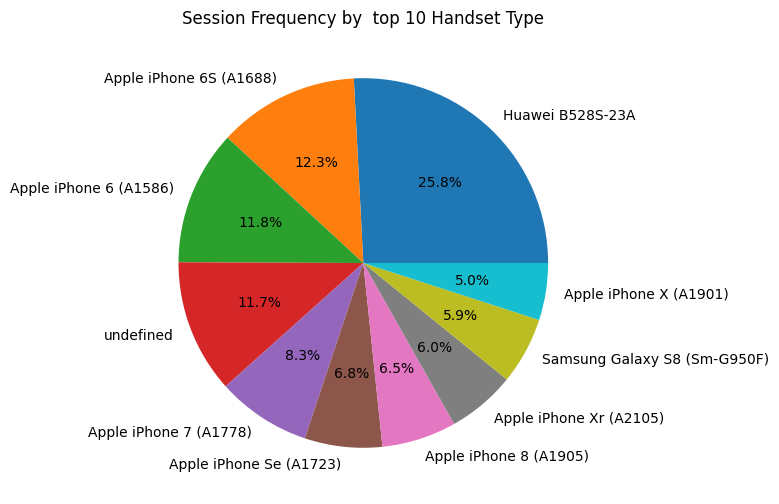

In [21]:
# Plotting a pie chart for session frequency by handset type
plt.figure(figsize=(8, 6))
plt.pie(type_frequency['Session F'], labels=type_frequency['Handset Type'], autopct='%1.1f%%')
plt.title('Session Frequency by  top 10 Handset Type')
plt.show()

## Duration of Session Frequency

In [22]:
# Calculate session duration by subtracting "End ms" from "Start ms"
Session_Duration = dd['Dur. (ms)']



# Print the session duration for each "Bearer Id"
print(Session_Duration)

0         1823652.0
1         1365104.0
2         1361762.0
3         1321509.0
4         1089009.0
            ...    
149996      81230.0
149997      97970.0
149998      98249.0
149999      97910.0
150000          NaN
Name: Dur. (ms), Length: 150001, dtype: float64


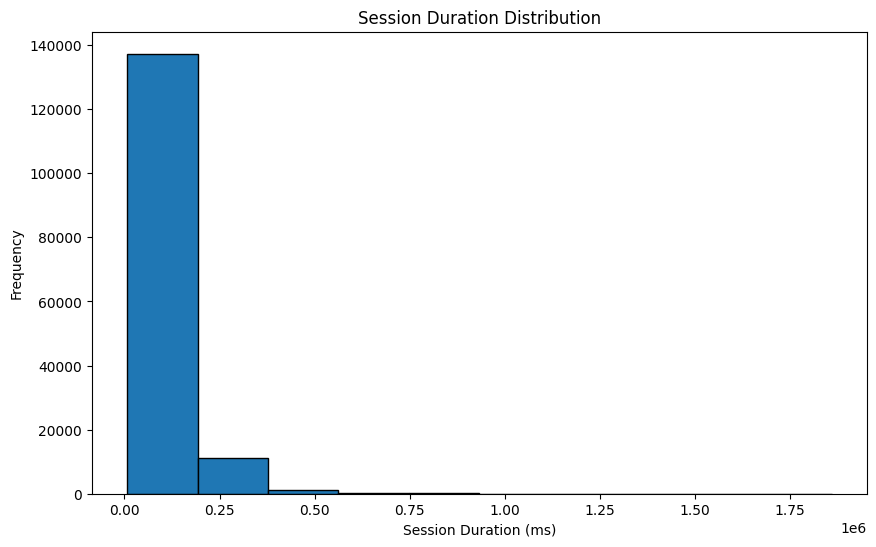

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(Session_Duration, bins=10, edgecolor='black')
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

In [24]:
#When the count increases the duration deacreses

In [25]:
B.describe()

,MSISDN/Number,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Activity Duration DL (ms),Activity Duration UL (ms)
count,1.489350e+05,150000.000000,150000.000000,1.500000e+05,122172.000000,122189.000000,1.500000e+05,1.500000e+05
mean,4.188282e+10,499.188200,498.800880,1.046086e+05,109.795706,17.662883,1.829177e+06,1.408880e+06
std,2.447443e+12,288.611834,288.097653,8.103762e+04,619.782739,84.793524,5.696395e+06,4.643231e+06
min,3.360100e+10,0.000000,0.000000,7.142000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,3.365130e+10,250.000000,251.000000,5.744050e+04,32.000000,2.000000,1.487775e+04,2.153975e+04
50%,3.366371e+10,499.000000,500.000000,8.639900e+04,45.000000,5.000000,3.930450e+04,4.679350e+04
75%,3.368349e+10,749.000000,750.000000,1.324302e+05,70.000000,15.000000,6.796095e+05,5.990952e+05
max,8.823971e+14,999.000000,999.000000,1.859336e+06,96923.000000,7120.000000,1.365365e+08,1.449113e+08


# The session total traffic

In [27]:
total_traffic = dd['Total DL (Bytes)'] + dd['Total UL (Bytes)']

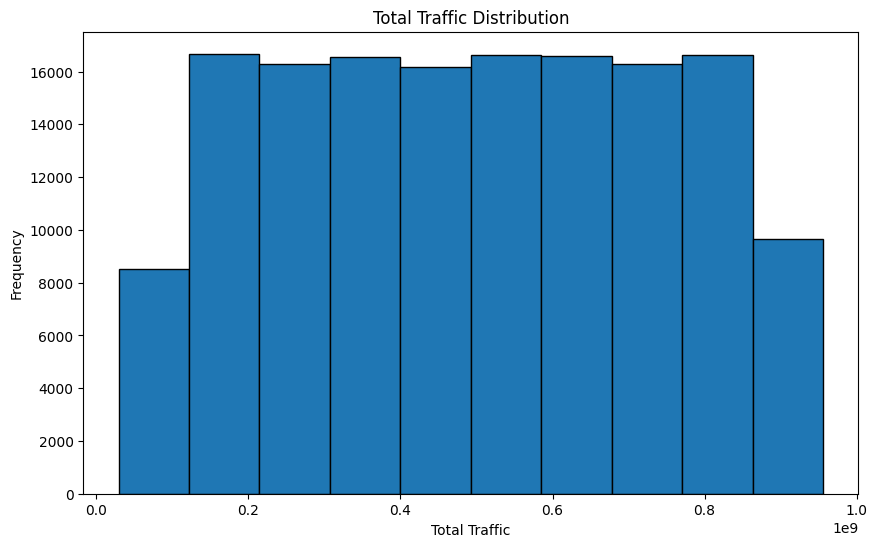

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(total_traffic, bins=10, edgecolor='black')
plt.title('Total Traffic Distribution')
plt.xlabel('Total Traffic')
plt.ylabel('Frequency')
plt.show()

In [29]:
total_traffic

0         345629377.0
1         707185356.0
2         307690973.0
3         889352748.0
4         607681403.0
             ...     
149996    631804110.0
149997    705783925.0
149998    627698629.0
149999    401522016.0
150000            NaN
Length: 150001, dtype: float64

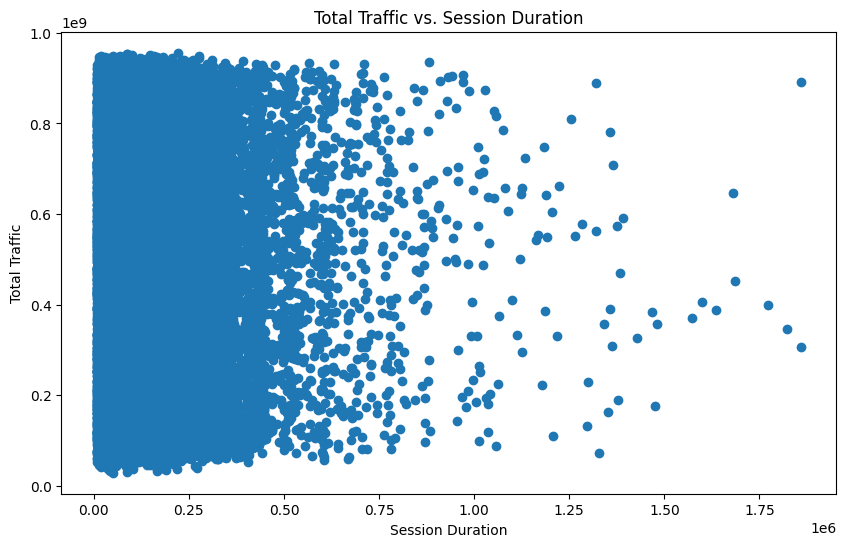

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(Session_Duration, total_traffic)
plt.title('Total Traffic vs. Session Duration')
plt.xlabel('Session Duration')
plt.ylabel('Total Traffic')
plt.show()

In [32]:
B.columns

Index(['Bearer Id', 'MSISDN/Number', 'Start ms', 'End ms', 'Dur. (ms)',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)'],
      dtype='object')

In [33]:
b={'MSISDN/Number':dd['MSISDN/Number'],"session_frequency":session_frequency,"session_duration":Session_Duration,'total_traffic':total_traffic}

In [34]:
c=pd.DataFrame(b)

In [35]:
c

,MSISDN/Number,session_frequency,session_duration,total_traffic
0,3.366496e+10,2.0,1823652.0,345629377.0
1,3.368185e+10,2.0,1365104.0,707185356.0
2,3.376063e+10,1.0,1361762.0,307690973.0
3,3.375034e+10,1.0,1321509.0,889352748.0
4,3.369980e+10,1.0,1089009.0,607681403.0
...,...,...,...,...
149996,3.365069e+10,1.0,81230.0,631804110.0
149997,3.366345e+10,2.0,97970.0,705783925.0
149998,3.362189e+10,1.0,98249.0,627698629.0
149999,3.361962e+10,1.0,97910.0,401522016.0


In [36]:
for i in c.columns:
   
    # check if the datatype is object or not
    if c[i].dtypes == "object":
        
        mode_value = c[i].mode()[0]
        c[i].fillna(mode_value, inplace = True)
    elif c[i].dtypes != "object":
        mean_value = c[i].mean()
        c[i].fillna(mean_value, inplace = True)

In [37]:
c

,MSISDN/Number,session_frequency,session_duration,total_traffic
0,3.366496e+10,2.000000,1.823652e+06,3.456294e+08
1,3.368185e+10,2.000000,1.365104e+06,7.071854e+08
2,3.376063e+10,1.000000,1.361762e+06,3.076910e+08
3,3.375034e+10,1.000000,1.321509e+06,8.893527e+08
4,3.369980e+10,1.000000,1.089009e+06,6.076814e+08
...,...,...,...,...
149996,3.365069e+10,1.000000,8.123000e+04,6.318041e+08
149997,3.366345e+10,2.000000,9.797000e+04,7.057839e+08
149998,3.362189e+10,1.000000,9.824900e+04,6.276986e+08
149999,3.361962e+10,1.000000,9.791000e+04,4.015220e+08


In [39]:
dframe=pd.concat([c,dd],axis=0)

## TELCOM TASK 2.1

### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [41]:
# Aggregate the metrics per customer ID
aggregated_data = dframe.groupby('MSISDN/Number').agg({
    'session_frequency': 'mean',
    'session_duration': 'sum',
    'total_traffic': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})

# Report the top 10 customers per engagement metric
top_10_frequency = aggregated_data.nlargest(10, 'session_frequency')
top_10_duration = aggregated_data.nlargest(10, 'session_duration')
top_10_traffic = aggregated_data.nlargest(10, 'total_traffic')
top_10_social_media = aggregated_data.nlargest(10, 'Social Media DL (Bytes)')
top_10_google = aggregated_data.nlargest(10, 'Google DL (Bytes)')
top_10_email = aggregated_data.nlargest(10, 'Email DL (Bytes)')
top_10_youtube = aggregated_data.nlargest(10, 'Youtube DL (Bytes)')
top_10_netflix = aggregated_data.nlargest(10, 'Netflix DL (Bytes)')
top_10_gaming = aggregated_data.nlargest(10, 'Gaming DL (Bytes)')
top_10_other = aggregated_data.nlargest(10, 'Other DL (Bytes)')


# Print the results
print("Top 10 Customers by Session Frequency:")
print(top_10_frequency)
print("\nTop 10 Customers by Session Duration:")
print(top_10_duration)
print("\nTop 10 Customers by Total Traffic:")
print(top_10_traffic)
print

Top 10 Customers by Session Frequency:
               session_frequency  session_duration  total_traffic  \
MSISDN/Number                                                       
3.362632e+10                18.0         8791927.0   7.971167e+09   
3.361489e+10                17.0         9966898.0   8.846226e+09   
3.362578e+10                17.0        18553754.0   8.499621e+09   
3.365973e+10                16.0         4035428.0   7.705863e+09   
3.367588e+10                15.0         4865947.0   7.891111e+09   
3.376054e+10                15.0         9279434.0   8.514774e+09   
3.366716e+10                13.0         8744914.0   5.618394e+09   
3.360313e+10                12.0         6287761.0   4.976195e+09   
3.360452e+10                12.0         5207990.0   5.487855e+09   
3.362708e+10                12.0         4703516.0   5.754731e+09   

               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                    

<function print>

**************************************************
Top 10 categories for session_frequency
1.0     77731
2.0     21452
3.0      4422
4.0      1950
5.0       938
6.0       208
7.0        75
8.0        34
9.0        17
10.0       12
Name: session_frequency, dtype: int64


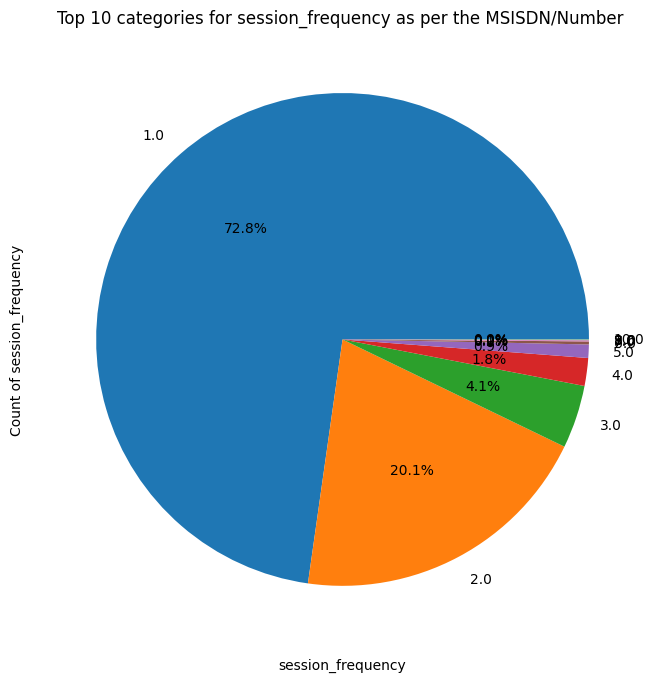

**************************************************
**************************************************
Top 10 categories for session_duration
86399.0     7873
86400.0     2015
172798.0    1138
172799.0     673
259197.0     271
259198.0     246
345597.0     192
345596.0     148
172800.0     133
431996.0     122
Name: session_duration, dtype: int64


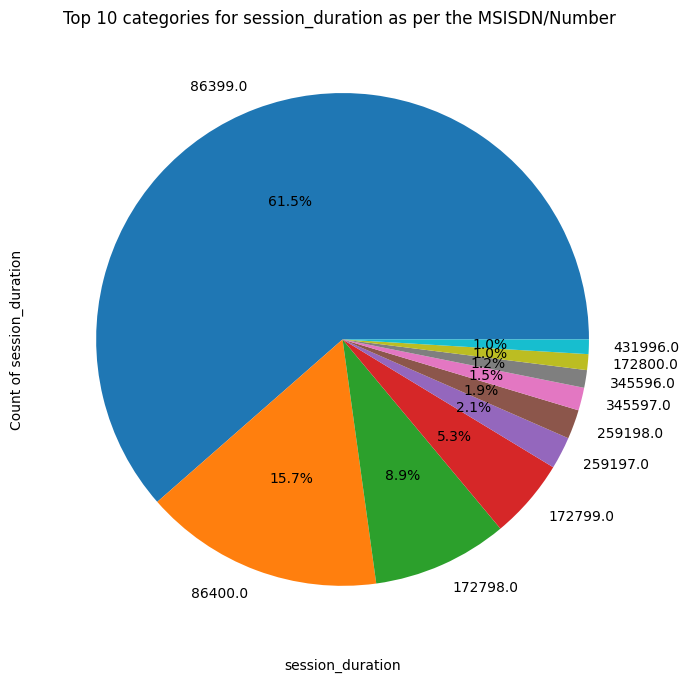

**************************************************
**************************************************
Top 10 categories for total_traffic
477037375.0    2
811996647.0    2
321294586.0    2
375293583.0    2
637726002.0    2
990132189.0    1
599733815.0    1
630092434.0    1
114976036.0    1
732463761.0    1
Name: total_traffic, dtype: int64


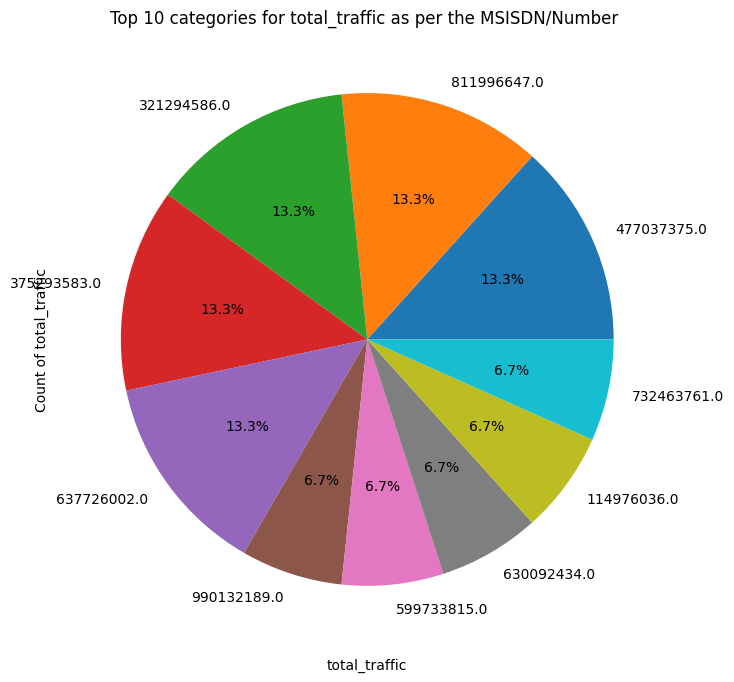

**************************************************
**************************************************
Top 10 categories for Social Media DL (Bytes)
2450530.0    3
1591078.0    3
2586604.0    3
2334058.0    3
3194199.0    3
2159055.0    3
2106903.0    3
2028429.0    3
802637.0     3
3263599.0    3
Name: Social Media DL (Bytes), dtype: int64


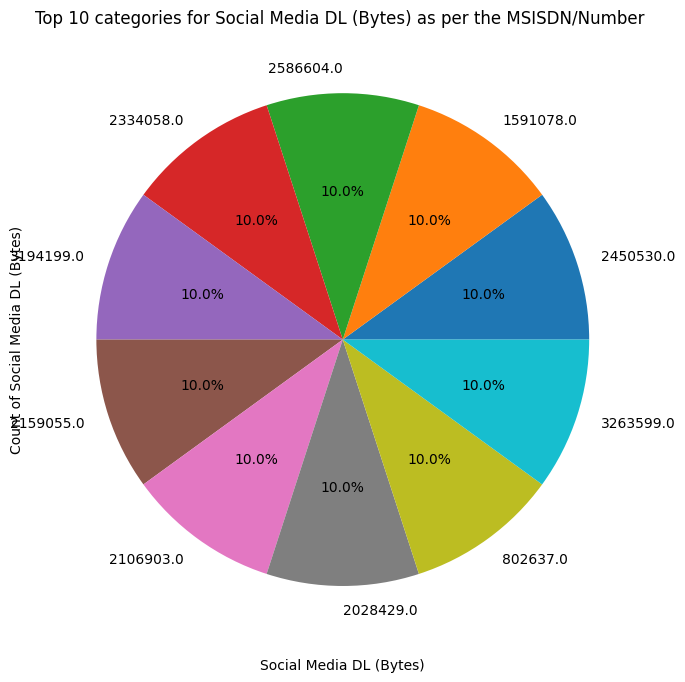

**************************************************
**************************************************
Top 10 categories for Social Media UL (Bytes)
57952.0    9
22250.0    9
61754.0    9
29179.0    8
65459.0    8
40418.0    8
51638.0    8
60828.0    8
44123.0    7
53496.0    7
Name: Social Media UL (Bytes), dtype: int64


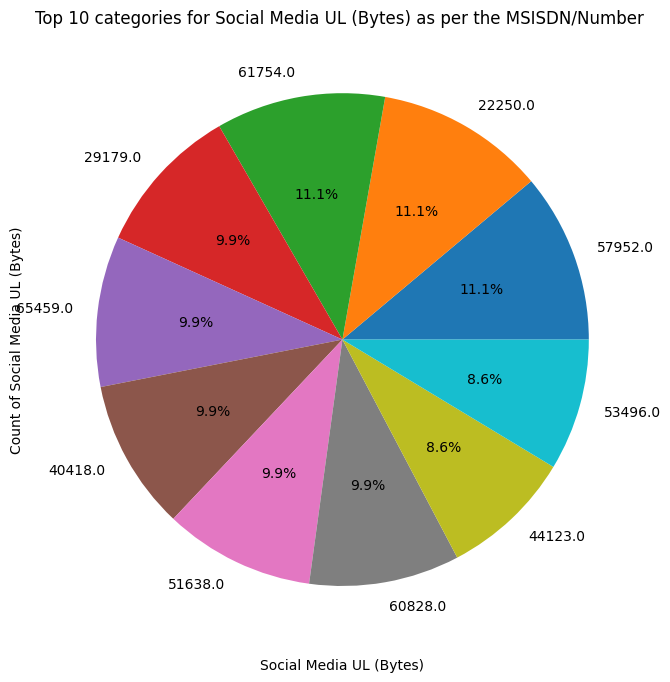

**************************************************
**************************************************
Top 10 categories for Google DL (Bytes)
6839538.0    3
8662757.0    3
128061.0     2
3975587.0    2
7326227.0    2
7614216.0    2
5325995.0    2
6653920.0    2
7040783.0    2
5442830.0    2
Name: Google DL (Bytes), dtype: int64


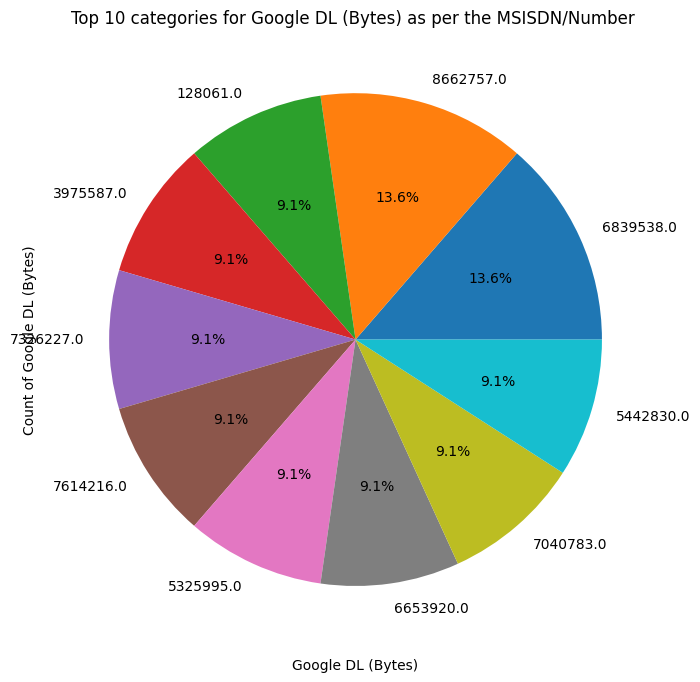

**************************************************
**************************************************
Top 10 categories for Google UL (Bytes)
2560372.0    3
3818169.0    3
2305277.0    3
2856925.0    3
3120933.0    3
350338.0     3
3557768.0    3
716419.0     2
2463948.0    2
1173790.0    2
Name: Google UL (Bytes), dtype: int64


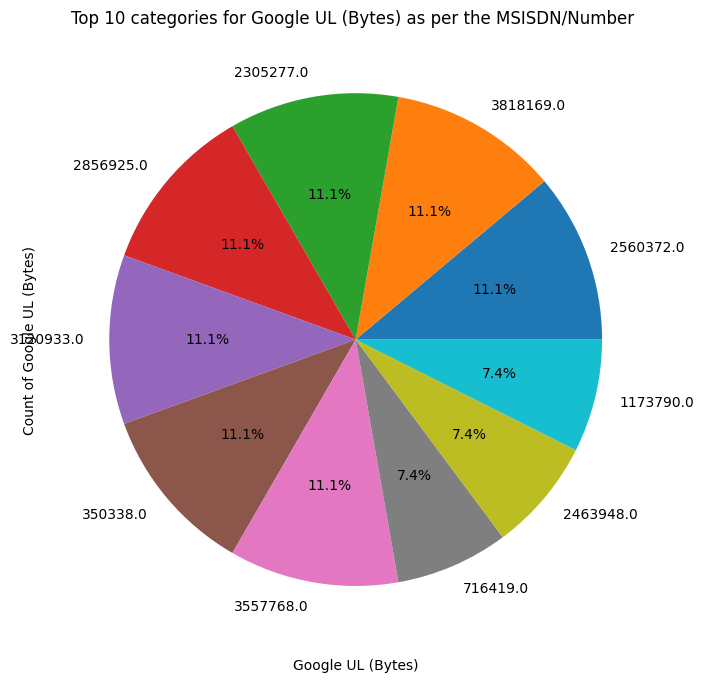

**************************************************
**************************************************
Top 10 categories for Email DL (Bytes)
3177858.0    3
3028657.0    3
2243709.0    3
3536751.0    3
1113690.0    3
2863091.0    3
136430.0     3
1212700.0    3
2144315.0    3
2978829.0    3
Name: Email DL (Bytes), dtype: int64


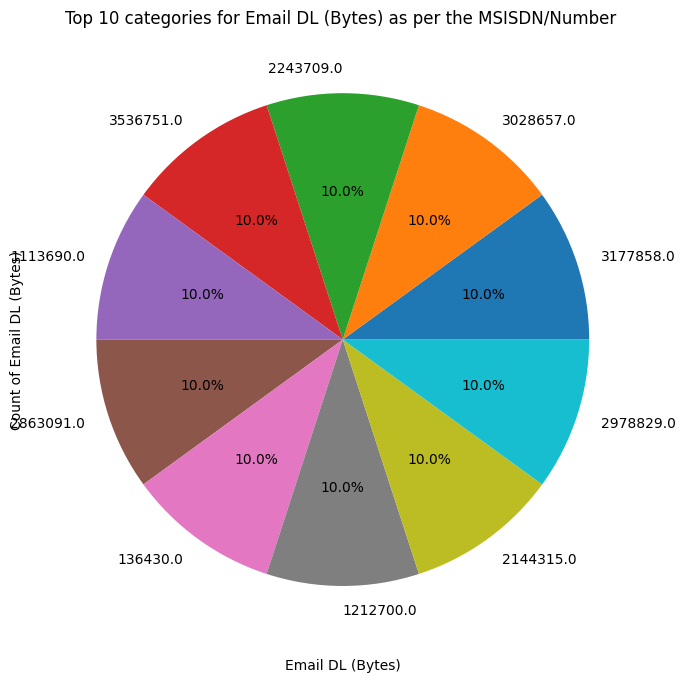

**************************************************
**************************************************
Top 10 categories for Email UL (Bytes)
326774.0    4
63879.0     4
590111.0    4
305354.0    4
893249.0    4
909694.0    4
598230.0    4
505716.0    4
382070.0    3
676010.0    3
Name: Email UL (Bytes), dtype: int64


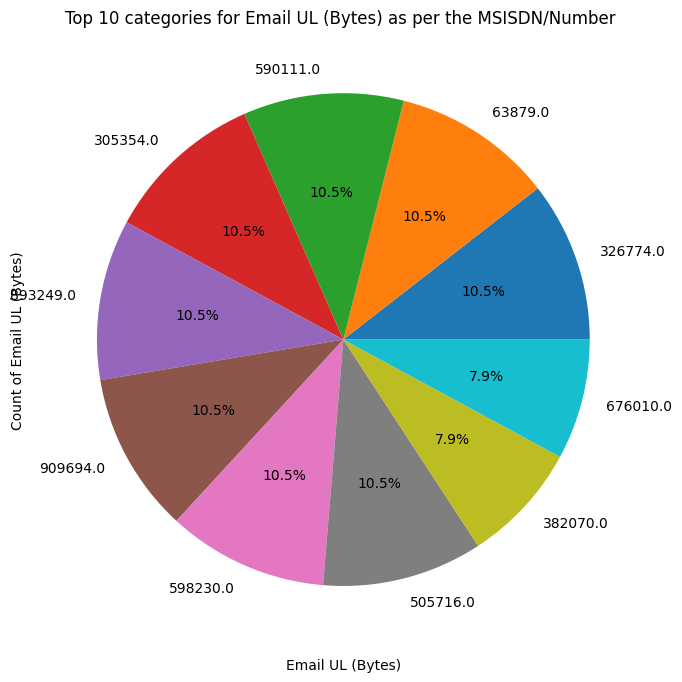

**************************************************
**************************************************
Top 10 categories for Youtube DL (Bytes)
19739158.0    2
3364291.0     2
16900080.0    2
5712949.0     2
12073292.0    2
10633865.0    2
21503895.0    2
13920466.0    2
13426045.0    2
11887559.0    2
Name: Youtube DL (Bytes), dtype: int64


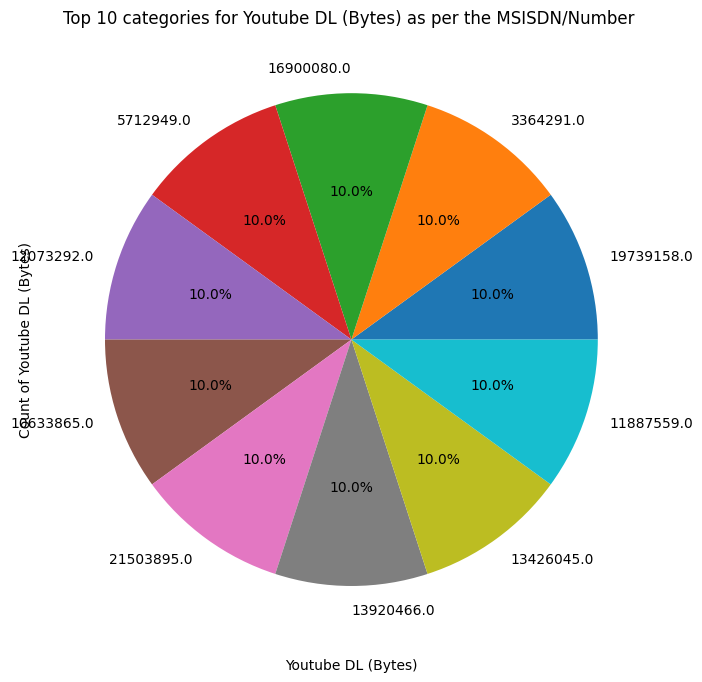

**************************************************
**************************************************
Top 10 categories for Youtube UL (Bytes)
2027396.0     2
25167269.0    2
830962.0      2
4697007.0     2
14360637.0    2
13520710.0    2
212990.0      2
12450119.0    2
5681048.0     2
3650869.0     2
Name: Youtube UL (Bytes), dtype: int64


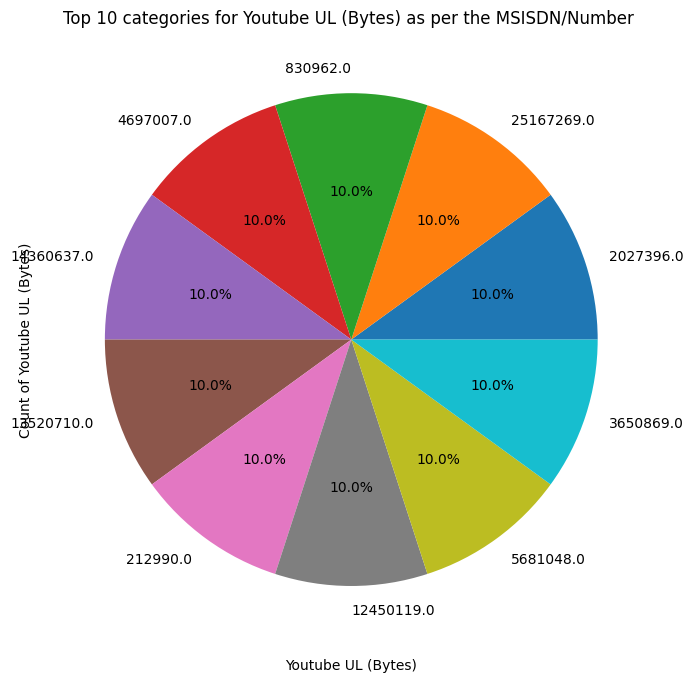

**************************************************
**************************************************
Top 10 categories for Netflix DL (Bytes)
11475034.0    2
2097111.0     2
21048072.0    2
4474859.0     2
15206145.0    2
17260640.0    2
8029884.0     2
660720.0      2
21841249.0    2
6288023.0     2
Name: Netflix DL (Bytes), dtype: int64


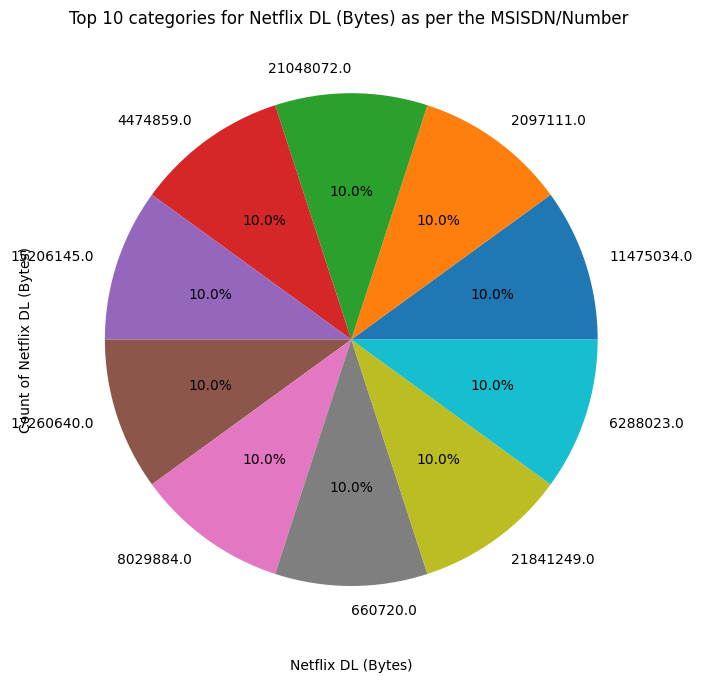

**************************************************
**************************************************
Top 10 categories for Netflix UL (Bytes)
9451822.0     2
20814068.0    2
4462331.0     2
15688382.0    2
20864896.0    2
16801656.0    2
20201855.0    2
10121404.0    2
721657.0      2
13901213.0    2
Name: Netflix UL (Bytes), dtype: int64


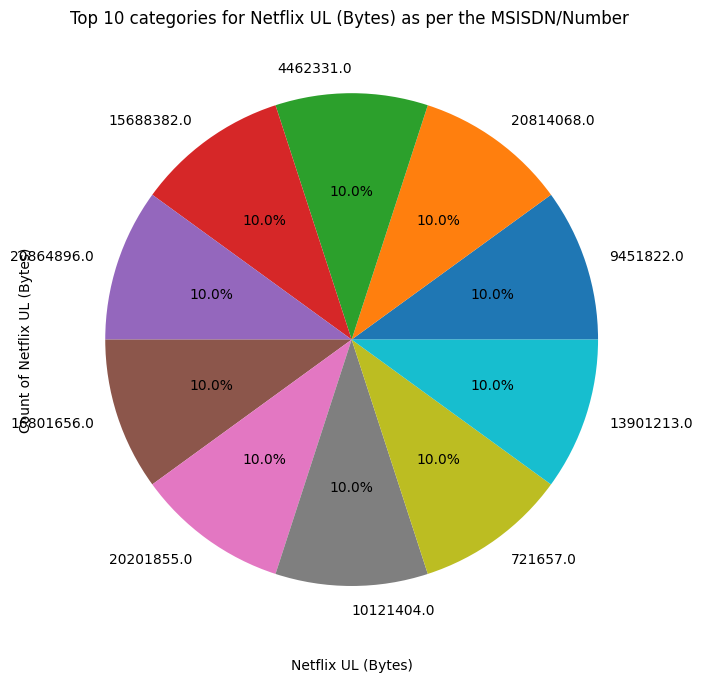

**************************************************
**************************************************
Top 10 categories for Gaming DL (Bytes)
6.862361e+08    2
1.153043e+08    2
1.397145e+08    2
8.236561e+08    2
7.681073e+08    2
6.814473e+08    2
6.384263e+08    2
6.476069e+08    2
3.880748e+08    1
1.308981e+09    1
Name: Gaming DL (Bytes), dtype: int64


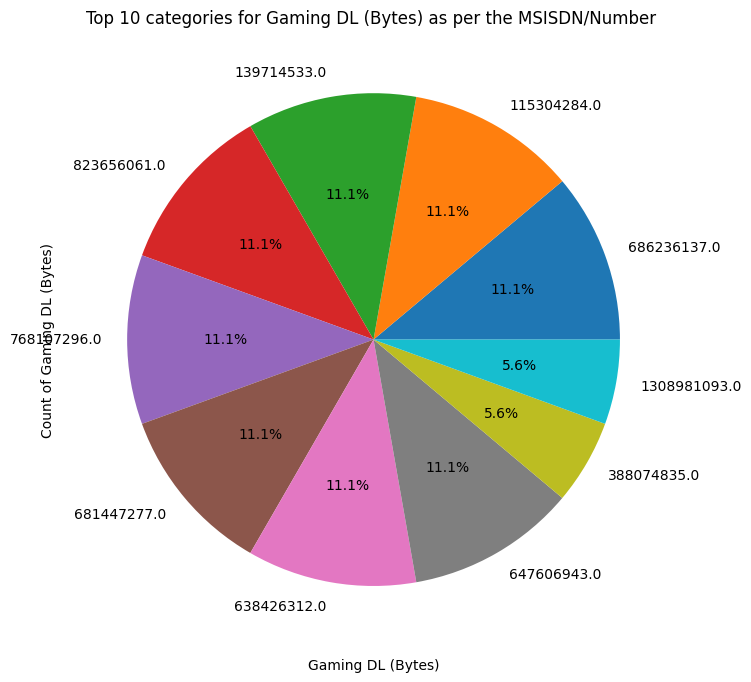

**************************************************
**************************************************
Top 10 categories for Gaming UL (Bytes)
10079814.0    3
13075526.0    2
6141584.0     2
11863263.0    2
14957018.0    2
11308299.0    2
3965941.0     2
16450457.0    2
14365103.0    2
8143373.0     2
Name: Gaming UL (Bytes), dtype: int64


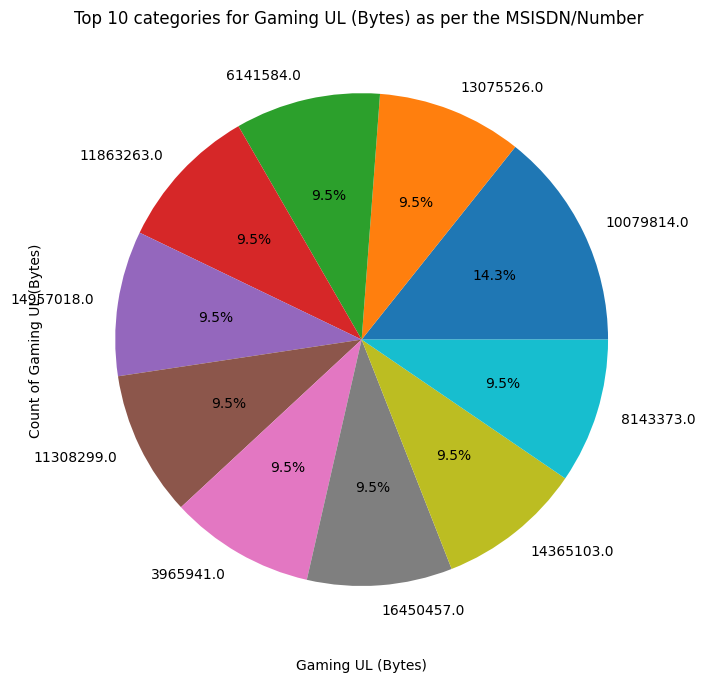

**************************************************
**************************************************
Top 10 categories for Other DL (Bytes)
7.027837e+08    2
3.935565e+08    2
1.085264e+08    2
7.372510e+08    2
1.586779e+08    2
6.261997e+08    2
1.026521e+09    1
4.338359e+08    1
5.950361e+08    1
5.406972e+08    1
Name: Other DL (Bytes), dtype: int64


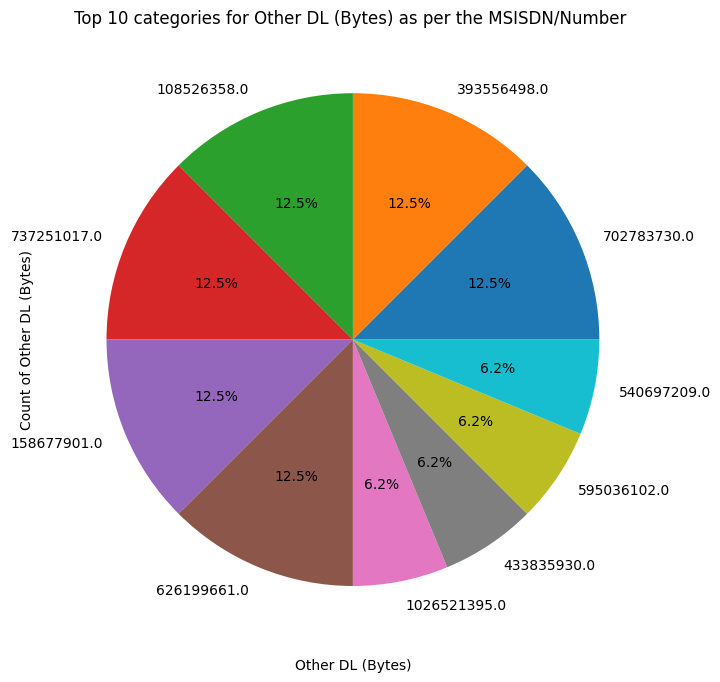

**************************************************
**************************************************
Top 10 categories for Other UL (Bytes)
8125986.0     3
461452.0      2
7607832.0     2
10052324.0    2
9471492.0     2
16037896.0    2
8663589.0     2
8925465.0     2
6213273.0     2
13366223.0    2
Name: Other UL (Bytes), dtype: int64


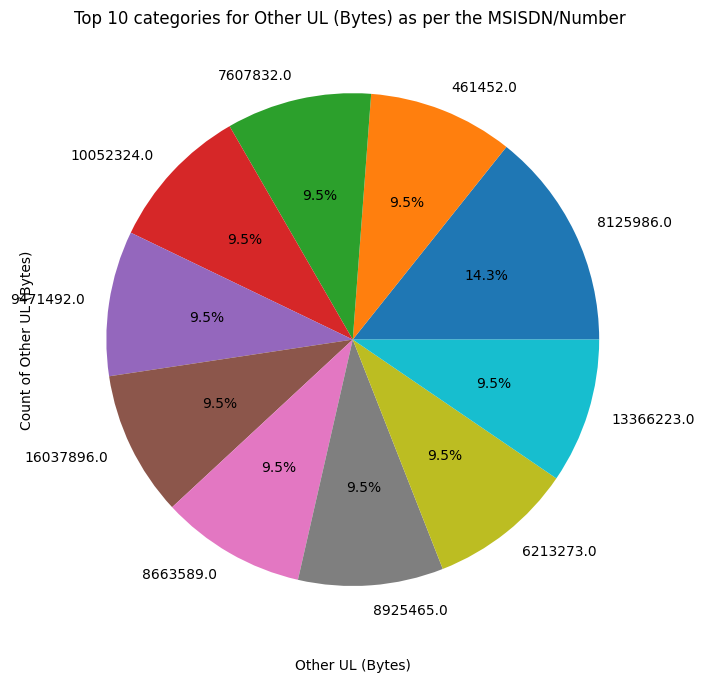

**************************************************


In [42]:
for col in aggregated_data:
    print("*"*50)
    print("Top 10 categories for {}".format(col))
    print(aggregated_data[col].value_counts().sort_values(ascending = False).head(10))
    index = aggregated_data[col].value_counts().sort_values(ascending = False).head(10).index
    values = aggregated_data[col].value_counts().sort_values(ascending = False).head(10).values
    plt.figure(figsize = [10,8])
    plt.pie(values, labels = index,autopct = '%.1f%%')
    plt.xlabel(col)
    plt.ylabel("Count of {}".format(col))
    plt.title("Top 10 categories for {} as per the MSISDN/Number ".format(col))
    plt.grid()
    plt.show();
    print("*"*50)

**************************************************
Top 10 categories for session_frequency
1.0     77731
2.0     21452
3.0      4422
4.0      1950
5.0       938
6.0       208
7.0        75
8.0        34
9.0        17
10.0       12
Name: session_frequency, dtype: int64


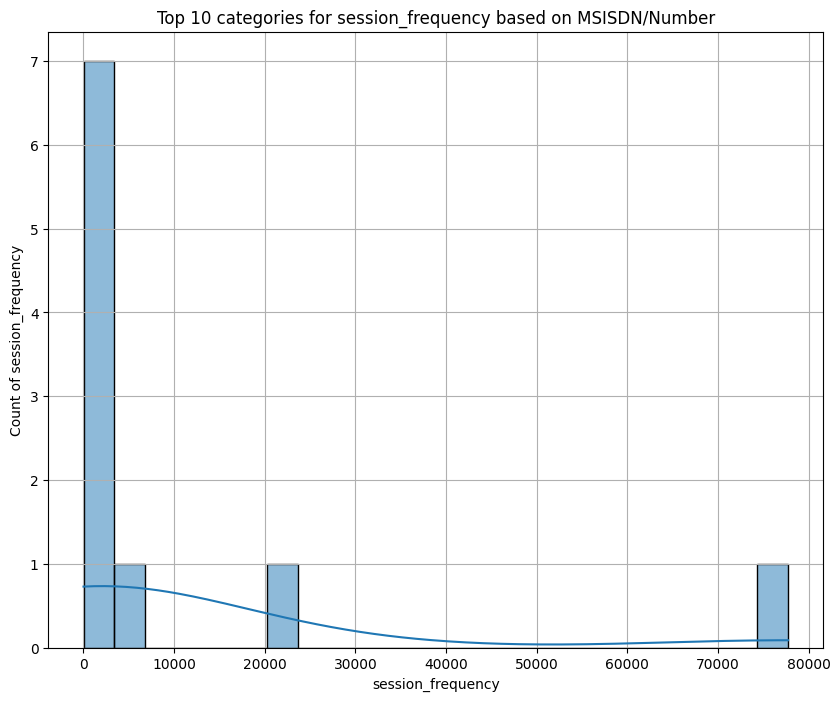

**************************************************
**************************************************
Top 10 categories for session_duration
86399.0     7873
86400.0     2015
172798.0    1138
172799.0     673
259197.0     271
259198.0     246
345597.0     192
345596.0     148
172800.0     133
431996.0     122
Name: session_duration, dtype: int64


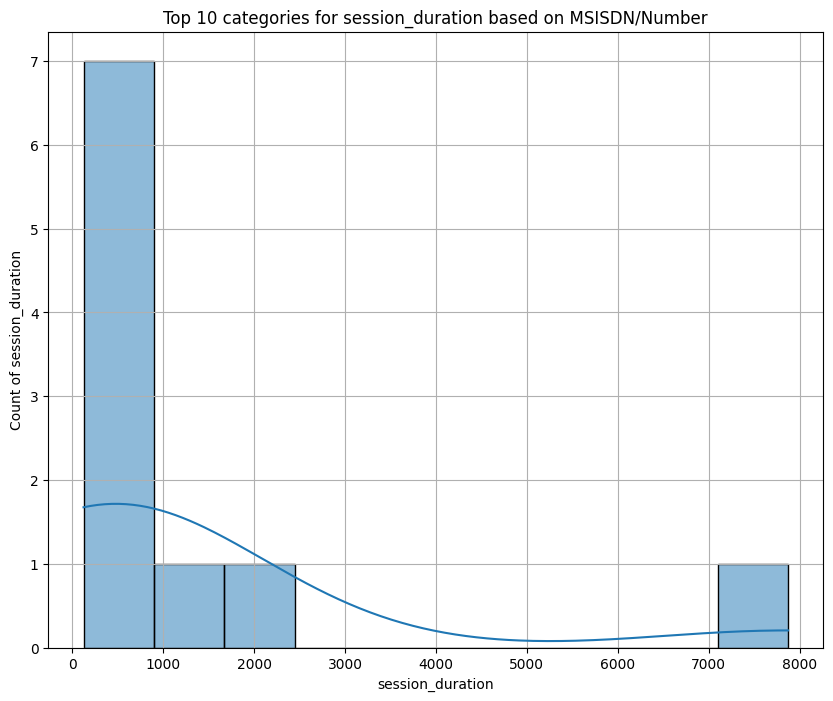

**************************************************
**************************************************
Top 10 categories for total_traffic
477037375.0    2
811996647.0    2
321294586.0    2
375293583.0    2
637726002.0    2
990132189.0    1
599733815.0    1
630092434.0    1
114976036.0    1
732463761.0    1
Name: total_traffic, dtype: int64


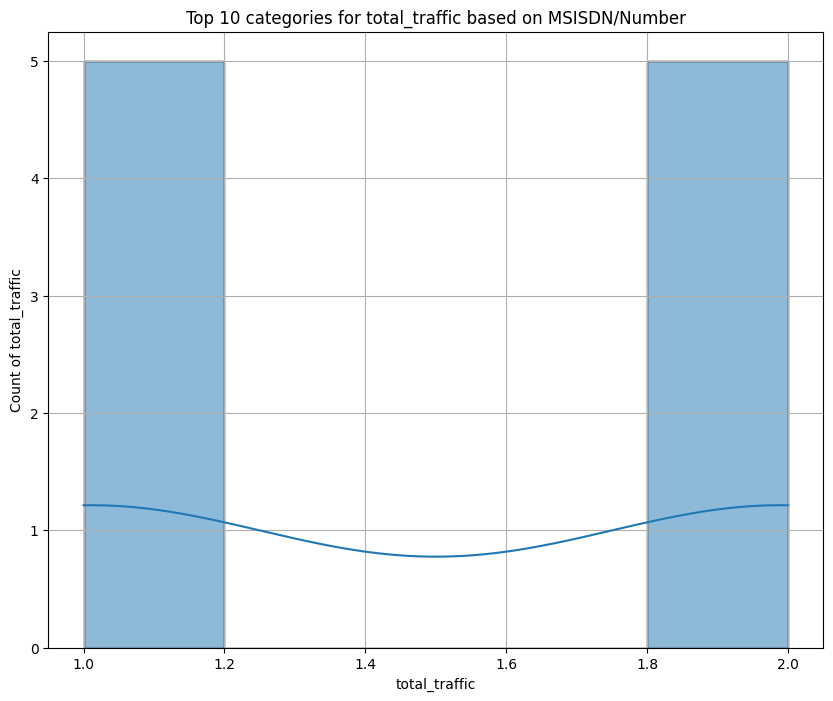

**************************************************
**************************************************
Top 10 categories for Social Media DL (Bytes)
2450530.0    3
1591078.0    3
2586604.0    3
2334058.0    3
3194199.0    3
2159055.0    3
2106903.0    3
2028429.0    3
802637.0     3
3263599.0    3
Name: Social Media DL (Bytes), dtype: int64


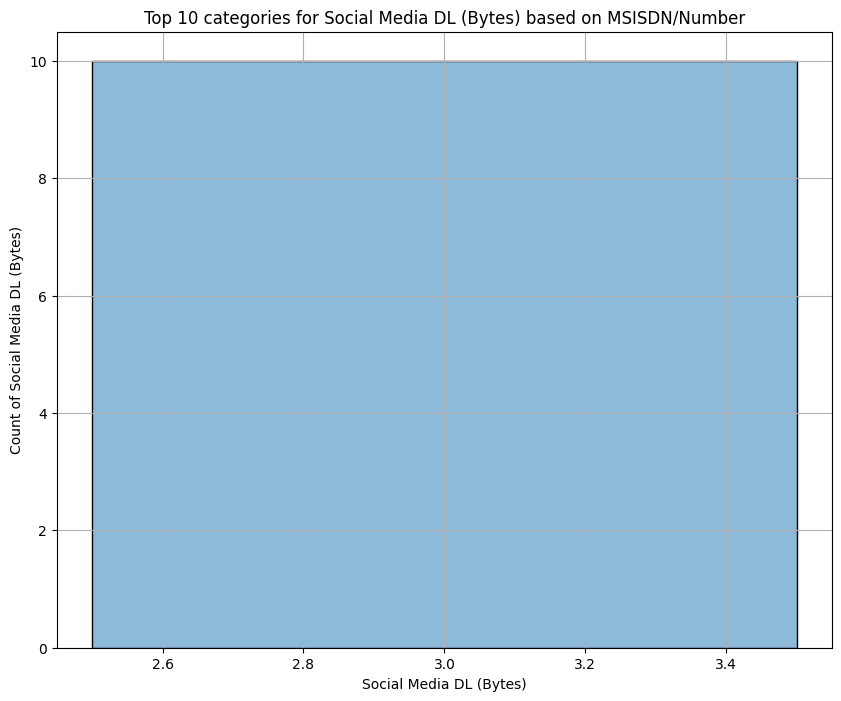

**************************************************
**************************************************
Top 10 categories for Social Media UL (Bytes)
57952.0    9
22250.0    9
61754.0    9
29179.0    8
65459.0    8
40418.0    8
51638.0    8
60828.0    8
44123.0    7
53496.0    7
Name: Social Media UL (Bytes), dtype: int64


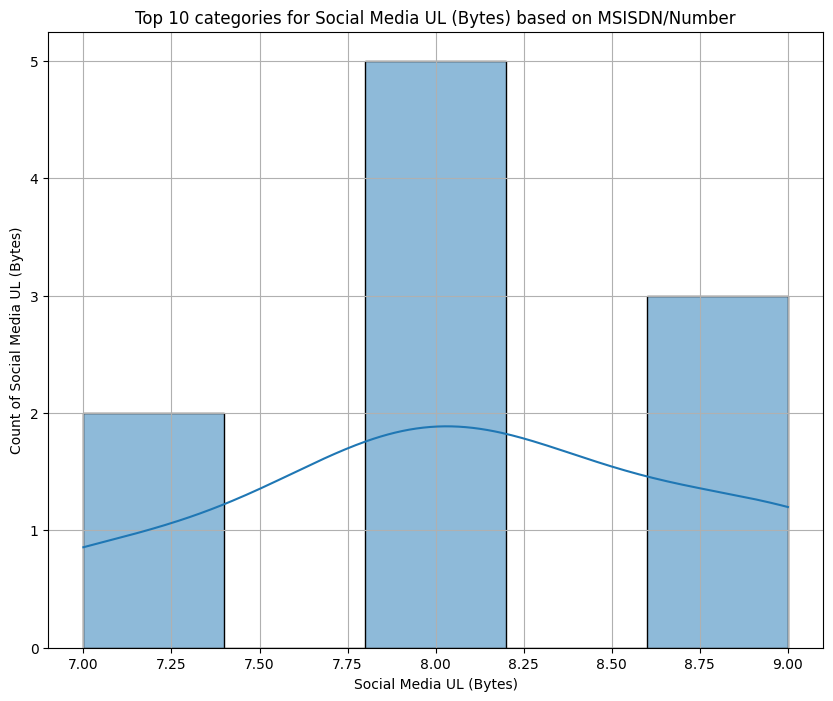

**************************************************
**************************************************
Top 10 categories for Google DL (Bytes)
6839538.0    3
8662757.0    3
128061.0     2
3975587.0    2
7326227.0    2
7614216.0    2
5325995.0    2
6653920.0    2
7040783.0    2
5442830.0    2
Name: Google DL (Bytes), dtype: int64


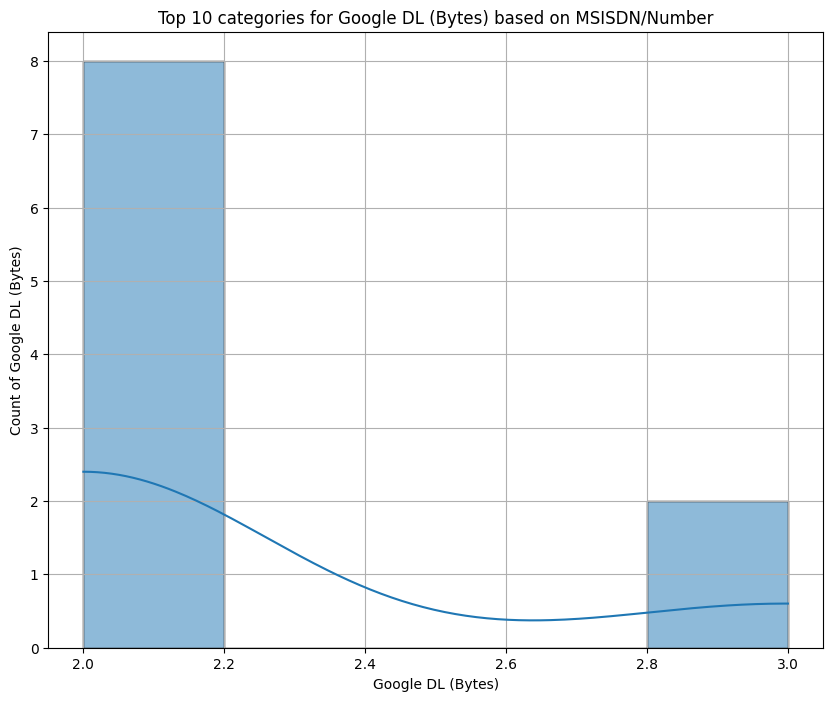

**************************************************
**************************************************
Top 10 categories for Google UL (Bytes)
2560372.0    3
3818169.0    3
2305277.0    3
2856925.0    3
3120933.0    3
350338.0     3
3557768.0    3
716419.0     2
2463948.0    2
1173790.0    2
Name: Google UL (Bytes), dtype: int64


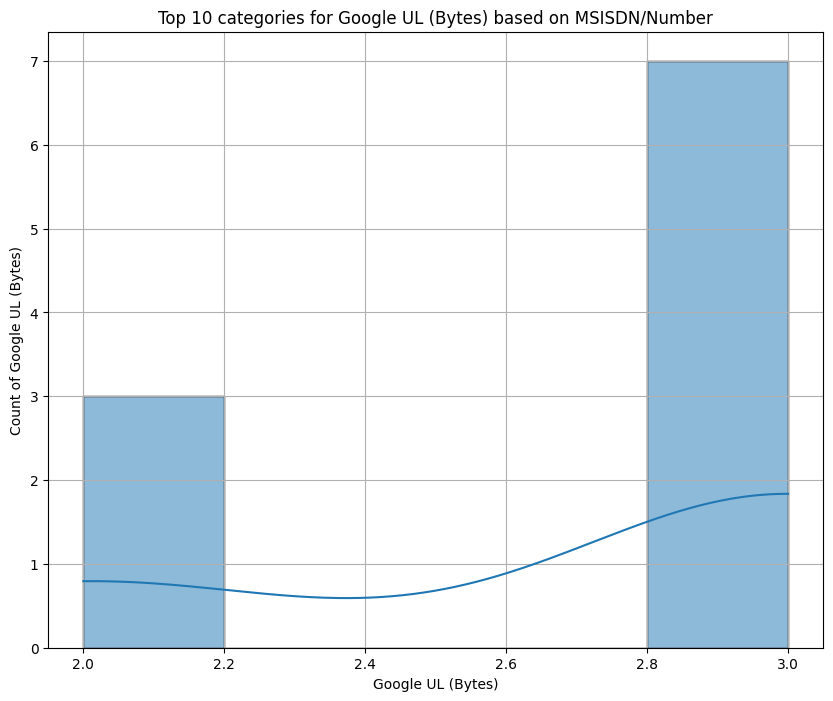

**************************************************
**************************************************
Top 10 categories for Email DL (Bytes)
3177858.0    3
3028657.0    3
2243709.0    3
3536751.0    3
1113690.0    3
2863091.0    3
136430.0     3
1212700.0    3
2144315.0    3
2978829.0    3
Name: Email DL (Bytes), dtype: int64


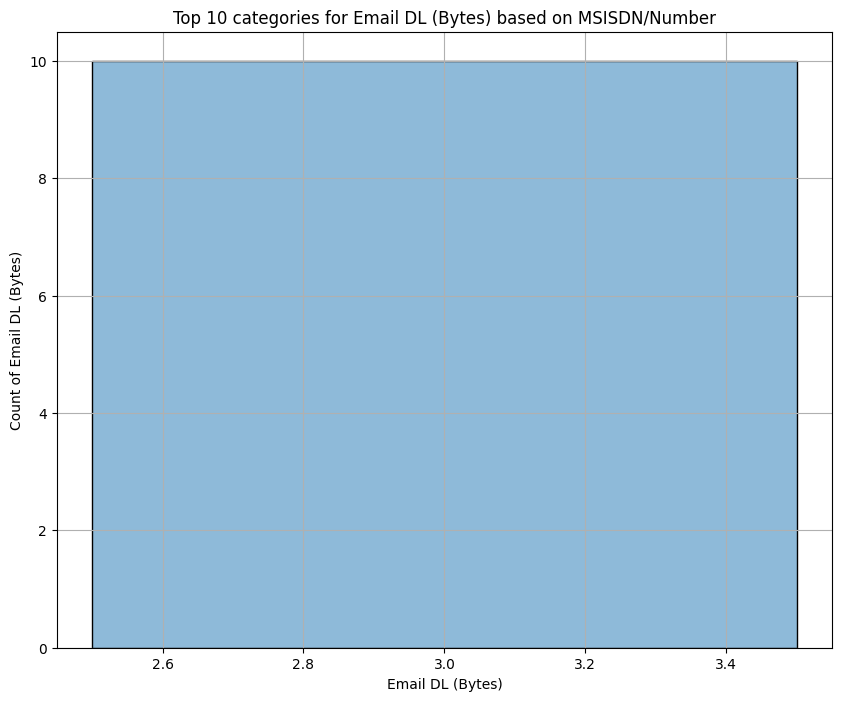

**************************************************
**************************************************
Top 10 categories for Email UL (Bytes)
326774.0    4
63879.0     4
590111.0    4
305354.0    4
893249.0    4
909694.0    4
598230.0    4
505716.0    4
382070.0    3
676010.0    3
Name: Email UL (Bytes), dtype: int64


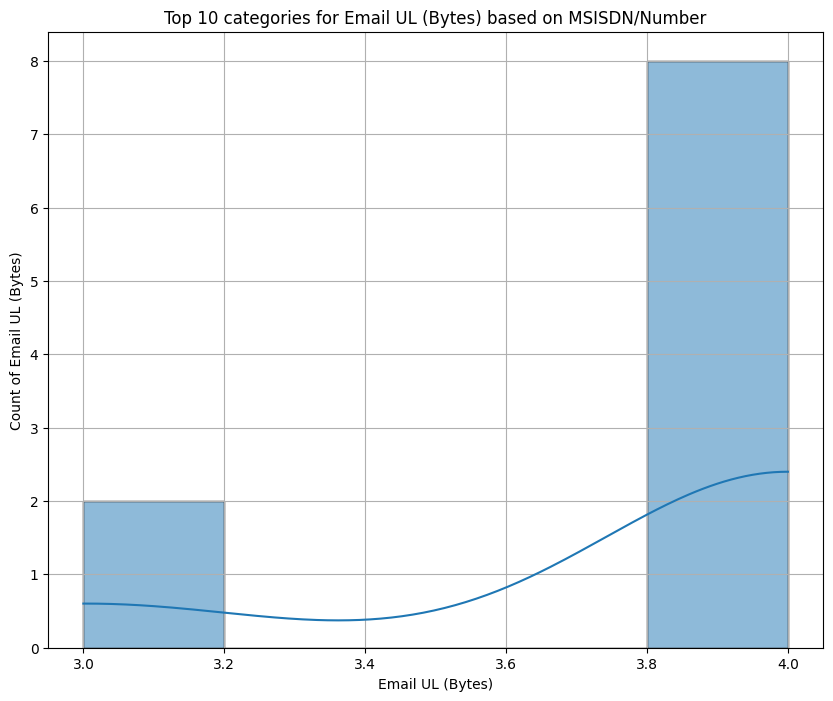

**************************************************
**************************************************
Top 10 categories for Youtube DL (Bytes)
19739158.0    2
3364291.0     2
16900080.0    2
5712949.0     2
12073292.0    2
10633865.0    2
21503895.0    2
13920466.0    2
13426045.0    2
11887559.0    2
Name: Youtube DL (Bytes), dtype: int64


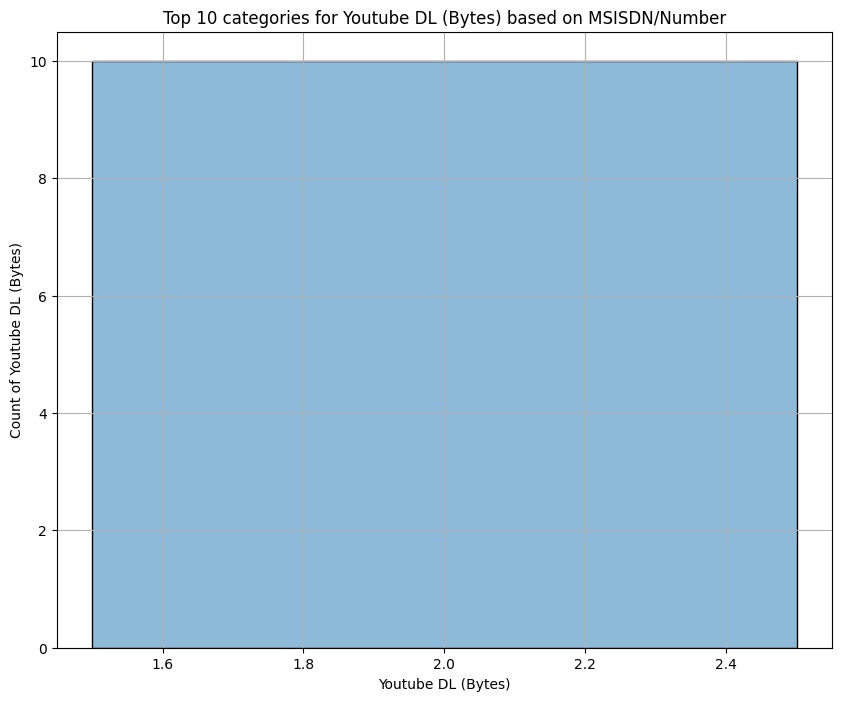

**************************************************
**************************************************
Top 10 categories for Youtube UL (Bytes)
2027396.0     2
25167269.0    2
830962.0      2
4697007.0     2
14360637.0    2
13520710.0    2
212990.0      2
12450119.0    2
5681048.0     2
3650869.0     2
Name: Youtube UL (Bytes), dtype: int64


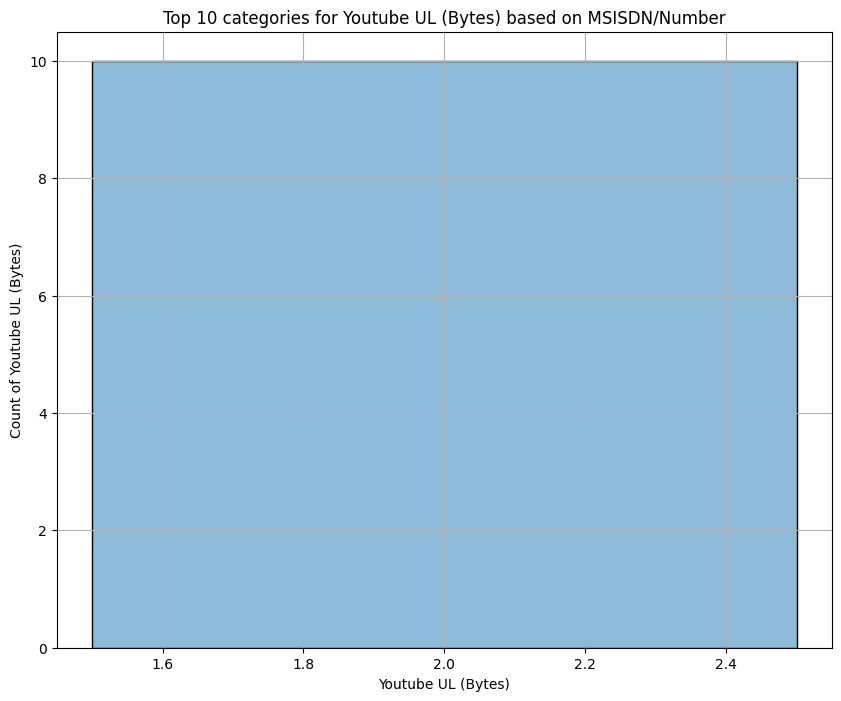

**************************************************
**************************************************
Top 10 categories for Netflix DL (Bytes)
11475034.0    2
2097111.0     2
21048072.0    2
4474859.0     2
15206145.0    2
17260640.0    2
8029884.0     2
660720.0      2
21841249.0    2
6288023.0     2
Name: Netflix DL (Bytes), dtype: int64


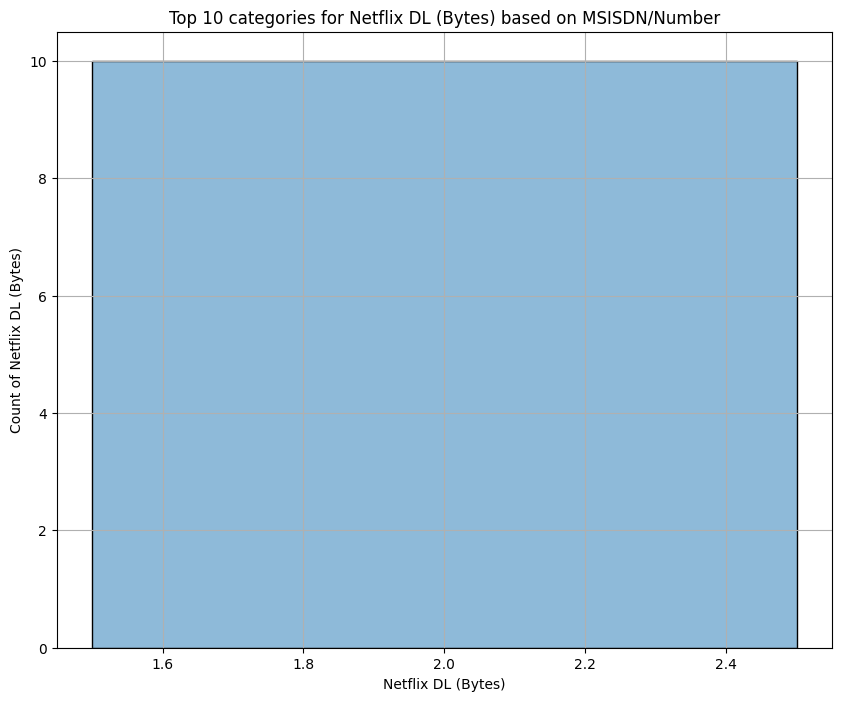

**************************************************
**************************************************
Top 10 categories for Netflix UL (Bytes)
9451822.0     2
20814068.0    2
4462331.0     2
15688382.0    2
20864896.0    2
16801656.0    2
20201855.0    2
10121404.0    2
721657.0      2
13901213.0    2
Name: Netflix UL (Bytes), dtype: int64


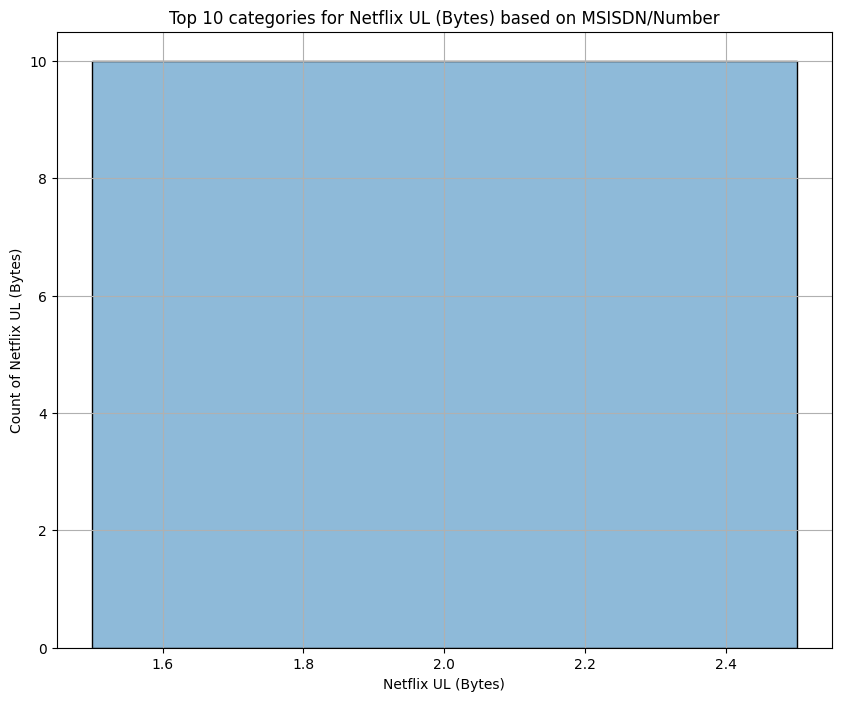

**************************************************
**************************************************
Top 10 categories for Gaming DL (Bytes)
6.862361e+08    2
1.153043e+08    2
1.397145e+08    2
8.236561e+08    2
7.681073e+08    2
6.814473e+08    2
6.384263e+08    2
6.476069e+08    2
3.880748e+08    1
1.308981e+09    1
Name: Gaming DL (Bytes), dtype: int64


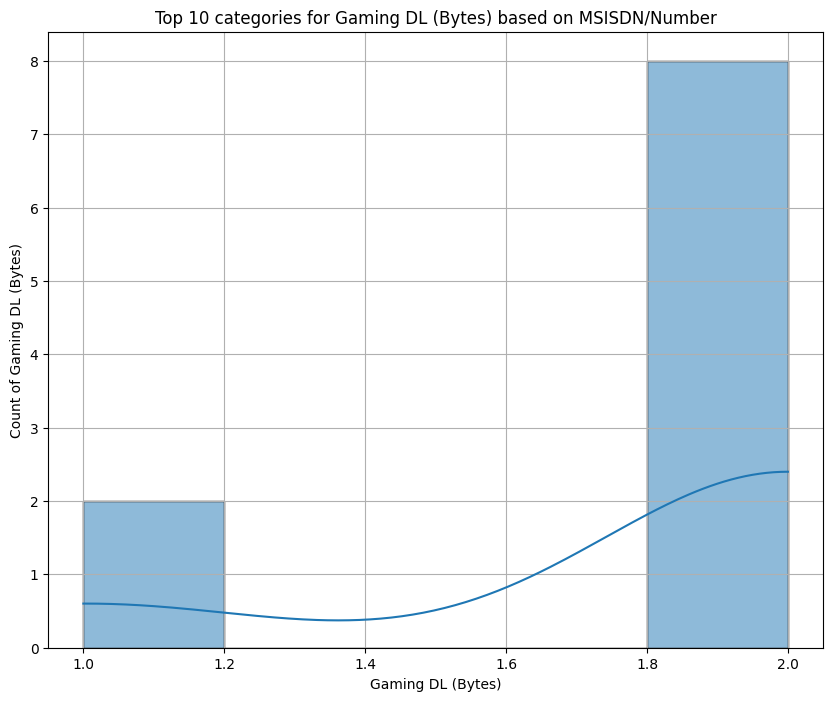

**************************************************
**************************************************
Top 10 categories for Gaming UL (Bytes)
10079814.0    3
13075526.0    2
6141584.0     2
11863263.0    2
14957018.0    2
11308299.0    2
3965941.0     2
16450457.0    2
14365103.0    2
8143373.0     2
Name: Gaming UL (Bytes), dtype: int64


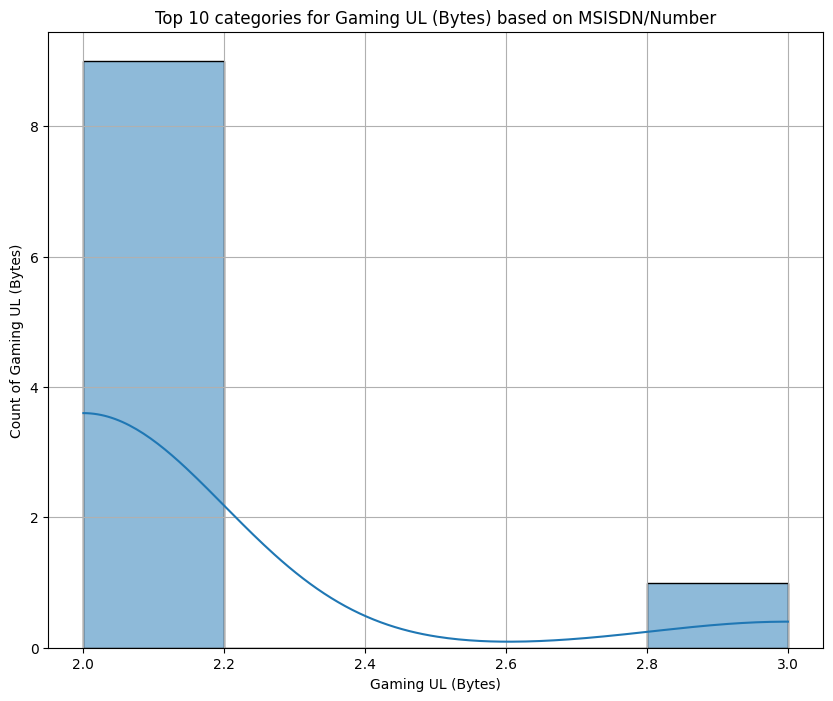

**************************************************
**************************************************
Top 10 categories for Other DL (Bytes)
7.027837e+08    2
3.935565e+08    2
1.085264e+08    2
7.372510e+08    2
1.586779e+08    2
6.261997e+08    2
1.026521e+09    1
4.338359e+08    1
5.950361e+08    1
5.406972e+08    1
Name: Other DL (Bytes), dtype: int64


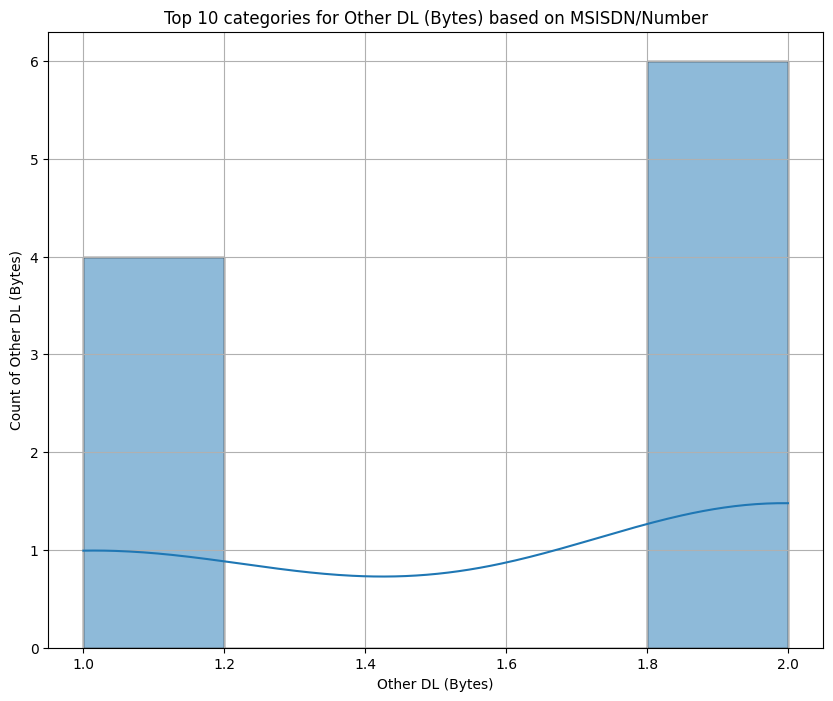

**************************************************
**************************************************
Top 10 categories for Other UL (Bytes)
8125986.0     3
461452.0      2
7607832.0     2
10052324.0    2
9471492.0     2
16037896.0    2
8663589.0     2
8925465.0     2
6213273.0     2
13366223.0    2
Name: Other UL (Bytes), dtype: int64


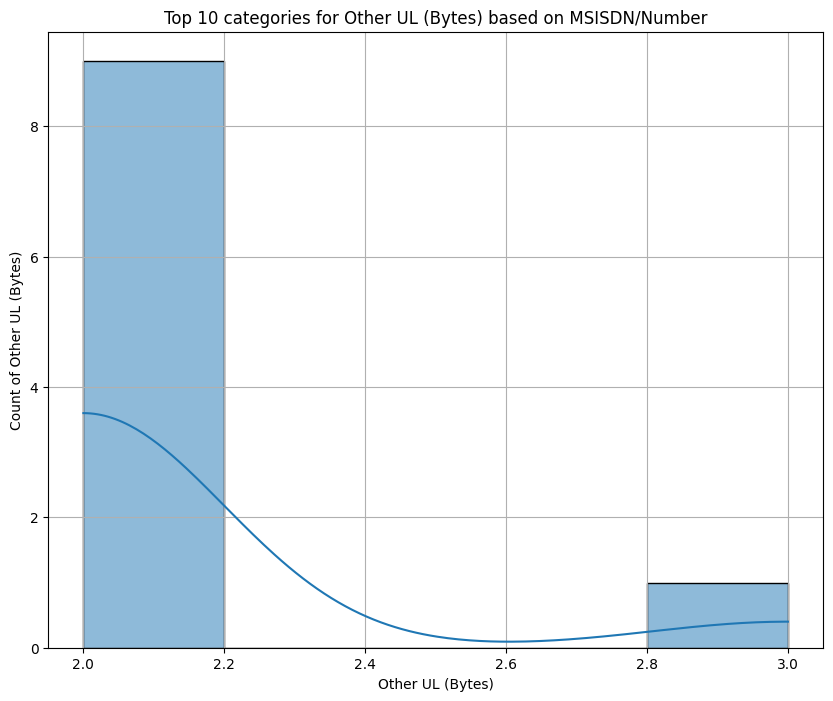

**************************************************


In [43]:
for col in aggregated_data:
    print("*"*50)
    print("Top 10 categories for {}".format(col))
    print(aggregated_data[col].value_counts().sort_values(ascending = False).head(10))
    index = aggregated_data[col].value_counts().sort_values(ascending = False).head(10).index
    values = aggregated_data[col].value_counts().sort_values(ascending = False).head(10).values
    plt.figure(figsize = [10,8])
    sns.histplot(values,kde=True)
    plt.xlabel(col)
    plt.ylabel("Count of {}".format(col))
    plt.title("Top 10 categories for {} based on MSISDN/Number".format(col))
    plt.grid()
    plt.show();
    print("*"*50)

In [44]:
engagement_metrics = ['session_frequency', 'session_duration', 'total_traffic', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                      'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                      'Other DL (Bytes)', 'Other UL (Bytes)']

aggregated_data = dframe.groupby('MSISDN/Number')[engagement_metrics].sum()
top_10_customers = {}

for metric in engagement_metrics:
    top_10_customers[metric] = aggregated_data.nlargest(10, metric)

for metric, top_10 in top_10_customers.items():
    print(f"Top 10 customers for {metric}:")
    print(top_10)
    print()

Top 10 customers for session_frequency:
               session_frequency  session_duration  total_traffic  \
MSISDN/Number                                                       
4.188282e+10         1982.659079      7.255100e+07   5.317447e+11   
3.362632e+10          324.000000      8.791927e+06   7.971167e+09   
3.361489e+10          289.000000      9.966898e+06   8.846226e+09   
3.362578e+10          289.000000      1.855375e+07   8.499621e+09   
3.365973e+10          256.000000      4.035428e+06   7.705863e+09   
3.367588e+10          225.000000      4.865947e+06   7.891111e+09   
3.376054e+10          225.000000      9.279434e+06   8.514774e+09   
3.366716e+10          169.000000      8.744914e+06   5.618394e+09   
3.360313e+10          144.000000      6.287761e+06   4.976195e+09   
3.360452e+10          144.000000      5.207990e+06   5.487855e+09   

               Gaming DL (Bytes)  Gaming UL (Bytes)  Social Media DL (Bytes)  \
MSISDN/Number                                      

#### Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.

0    78327
1    24701
2     3829
Name: Cluster, dtype: int64

Top 10 customers in Cluster 0:
               session_frequency  session_duration  total_traffic
MSISDN/Number                                                    
4.188282e+10         1982.659079      7.255100e+07   5.317447e+11
3.366926e+10            1.000000      1.573420e+06   3.704210e+08
3.366172e+10            1.000000      1.480875e+06   3.567835e+08
3.360750e+10            1.000000      1.474663e+06   1.770069e+08
3.376260e+10            1.000000      1.375612e+06   5.731594e+08
3.376063e+10            1.000000      1.361762e+06   3.076910e+08
3.376167e+10            1.000000      1.357643e+06   7.809365e+08
3.375034e+10            1.000000      1.321509e+06   8.893527e+08
3.366682e+10            1.000000      1.299381e+06   2.293477e+08
3.363050e+10            1.000000      1.177517e+06   2.234732e+08

Top 10 customers in Cluster 1:
               session_frequency  session_duration  total_traffic
MSISDN/Number    

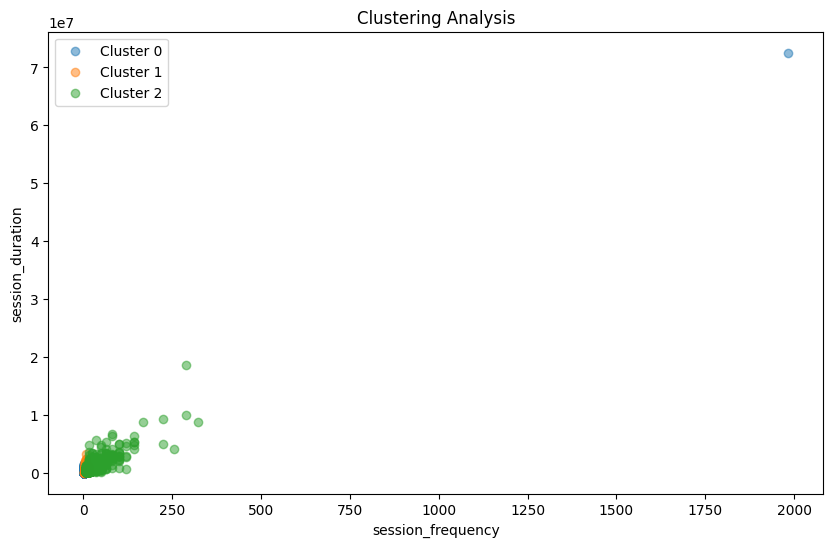

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(aggregated_data[engagement_metrics])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)



# Assign cluster labels to data
customer_clusters = kmeans.labels_

# Add cluster labels to the aggregate dataframe
aggregated_data['Cluster'] = customer_clusters

# Print the number of customers in each cluster
print(aggregated_data['Cluster'].value_counts())

# Print the details of the top 10 customers in each cluster
for cluster in range(3):
    print(f"\nTop 10 customers in Cluster {cluster}:")
    top_10_customers = aggregated_data[aggregated_data['Cluster'] == cluster].nlargest(10, 'session_duration')
    print(top_10_customers[['session_frequency', 'session_duration', 'total_traffic']])

x_metric = 'session_frequency'
y_metric = 'session_duration'

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = aggregated_data[aggregated_data['Cluster'] == cluster]
    plt.scatter(cluster_data[x_metric], cluster_data[y_metric], label=f'Cluster {cluster}',alpha=0.5)
plt.xlabel(x_metric)
plt.ylabel(y_metric)
plt.title('Clustering Analysis')
plt.legend()
plt.show()

In [47]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the aggregated data
aggregated_data['Engagement Cluster'] = cluster_labels
cluster_metrics = aggregated_data.groupby('Engagement Cluster')[engagement_metrics].agg(['min', 'max', 'mean', 'sum'])
print(cluster_metrics)
# Calculate the standard deviation for each metric within each cluster
cluster_std = aggregated_data.groupby('Engagement Cluster')[engagement_metrics]

                   session_frequency                                         \
                                 min          max       mean            sum   
Engagement Cluster                                                            
0                                1.0  1982.659079   1.048242   82105.659079   
1                                1.0    16.000000   4.783288  118152.000000   
2                                9.0   324.000000  20.561504   78730.000000   

                   session_duration                               \
                                min           max           mean   
Engagement Cluster                                                 
0                            7142.0  7.255100e+07  105084.697825   
1                           14161.0  3.174824e+06  211290.579491   
2                           42678.0  1.855375e+07  585356.732828   

                                 total_traffic                ...  \
                             sum           min 

In [48]:
# Define a dictionary to store the cluster statistics
cluster_stats = {}

# Iterate over each cluster
for cluster in range(3):
    cluster_data = aggregated_data[aggregated_data['Engagement Cluster'] == cluster]
    cluster_stats[cluster] = {}

    # Calculate the mean, maximum, minimum, and sum values for each feature within the cluster
    for metric in engagement_metrics:
        metric_stats = {
            'mean': cluster_data[metric].mean(),
            'max': cluster_data[metric].max(),
            'min': cluster_data[metric].min(),
            'sum': cluster_data[metric].sum()
        }
        cluster_stats[cluster][metric] = metric_stats

# Print the cluster statistics
for cluster in range(3):
    print(f"\nCluster {cluster} Statistics:")
    for metric in engagement_metrics:
        metric_stats = cluster_stats[cluster][metric]
        print(f"{metric}:")
        print(f"   Mean: {metric_stats['mean']}")
        print(f"   Max: {metric_stats['max']}")
        print(f"   Min: {metric_stats['min']}")
        print(f"   Sum: {metric_stats['sum']}")


Cluster 0 Statistics:
session_frequency:
   Mean: 1.0482421014396592
   Max: 1982.6590794641959
   Min: 1.0
   Sum: 82105.6590794642
session_duration:
   Mean: 105084.6978252754
   Max: 72551004.56034666
   Min: 7142.0
   Sum: 8230969126.560347
total_traffic:
   Mean: 505513288.51328886
   Max: 531744709244.3711
   Min: 33249009.0
   Sum: 39595339349380.375
Gaming DL (Bytes):
   Mean: 424735379.41090554
   Max: 1608289147.0
   Min: 0.0
   Sum: 33268248063118.0
Gaming UL (Bytes):
   Mean: 8313608.861554764
   Max: 32011800.0
   Min: 0.0
   Sum: 651180041299.0
Social Media DL (Bytes):
   Mean: 1803980.592120214
   Max: 6796235.0
   Min: 0.0
   Sum: 141300387839.0
Social Media UL (Bytes):
   Mean: 33004.26778760836
   Max: 126866.0
   Min: 0.0
   Sum: 2585125283.0
Google DL (Bytes):
   Mean: 5773292.07311655
   Max: 21915547.0
   Min: 0.0
   Sum: 452204648211.0
Google UL (Bytes):
   Mean: 2060829.5066324512
   Max: 7031788.0
   Min: 0.0
   Sum: 161418592766.0
Email DL (Bytes):
   Mean: 1

In [49]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the aggregated data
aggregated_data['Engagement Cluster'] = cluster_labels

# Calculate the standard deviation for each metric within each cluster using a for loop
cluster_std = {}
for cluster in range(3):
    cluster_data = aggregated_data[aggregated_data['Engagement Cluster'] == cluster]
    cluster_std[cluster] = cluster_data[engagement_metrics].std()

# Print the standard deviation for each metric within each cluster
for cluster, std in cluster_std.items():
    print(f"\nCluster {cluster} - Standard Deviation:")
    print(std)


Cluster 0 - Standard Deviation:
session_frequency          7.085391e+00
session_duration           2.696341e+05
total_traffic              1.914016e+09
Gaming DL (Bytes)          2.450290e+08
Gaming UL (Bytes)          4.810474e+06
Social Media DL (Bytes)    1.044813e+06
Social Media UL (Bytes)    1.914397e+04
Google DL (Bytes)          3.325634e+06
Google UL (Bytes)          1.196013e+06
Email DL (Bytes)           1.041919e+06
Email UL (Bytes)           2.717527e+05
Youtube DL (Bytes)         6.753287e+06
Youtube UL (Bytes)         6.386304e+06
Netflix DL (Bytes)         6.756919e+06
Netflix UL (Bytes)         6.385875e+06
Other DL (Bytes)           2.446976e+08
Other UL (Bytes)           4.790599e+06
dtype: float64

Cluster 1 - Standard Deviation:
session_frequency          1.837100e+00
session_duration           1.432246e+05
total_traffic              3.916594e+08
Gaming DL (Bytes)          3.822269e+08
Gaming UL (Bytes)          7.501741e+06
Social Media DL (Bytes)    1.622830e+06

In [50]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the aggregated data
aggregated_data['Engagement Cluster'] = cluster_labels

# Calculate the standard deviation for each metric within each cluster using a for loop
cluster_std = {}
for cluster in range(3):
    cluster_data = aggregated_data[aggregated_data['Engagement Cluster'] == cluster]
    cluster_std[cluster] = cluster_data[engagement_metrics].std()

# Print the standard deviation for each metric within each cluster
for cluster, std in cluster_std.items():
    print(f"\nCluster {cluster} - Standard Deviation:")
    print(std)


Cluster 0 - Standard Deviation:
session_frequency          7.085391e+00
session_duration           2.696341e+05
total_traffic              1.914016e+09
Gaming DL (Bytes)          2.450290e+08
Gaming UL (Bytes)          4.810474e+06
Social Media DL (Bytes)    1.044813e+06
Social Media UL (Bytes)    1.914397e+04
Google DL (Bytes)          3.325634e+06
Google UL (Bytes)          1.196013e+06
Email DL (Bytes)           1.041919e+06
Email UL (Bytes)           2.717527e+05
Youtube DL (Bytes)         6.753287e+06
Youtube UL (Bytes)         6.386304e+06
Netflix DL (Bytes)         6.756919e+06
Netflix UL (Bytes)         6.385875e+06
Other DL (Bytes)           2.446976e+08
Other UL (Bytes)           4.790599e+06
dtype: float64

Cluster 1 - Standard Deviation:
session_frequency          1.837100e+00
session_duration           1.432246e+05
total_traffic              3.916594e+08
Gaming DL (Bytes)          3.822269e+08
Gaming UL (Bytes)          7.501741e+06
Social Media DL (Bytes)    1.622830e+06

In [51]:
# Compute the minimum, maximum, average, and total non-normalized metrics for each cluster
cluster_metrics_non_normalized = aggregated_data.groupby('Engagement Cluster')[engagement_metrics].agg(['min', 'max', 'mean', 'sum'])

# Display the metrics for each cluster
print(cluster_metrics_non_normalized)
# Define the engagement metrics to visualize
metrics_to_visualize = ['session_frequency', 'session_duration', 'total_traffic']

                   session_frequency                                         \
                                 min          max       mean            sum   
Engagement Cluster                                                            
0                                1.0  1982.659079   1.048242   82105.659079   
1                                1.0    16.000000   4.783288  118152.000000   
2                                9.0   324.000000  20.561504   78730.000000   

                   session_duration                               \
                                min           max           mean   
Engagement Cluster                                                 
0                            7142.0  7.255100e+07  105084.697825   
1                           14161.0  3.174824e+06  211290.579491   
2                           42678.0  1.855375e+07  585356.732828   

                                 total_traffic                ...  \
                             sum           min 

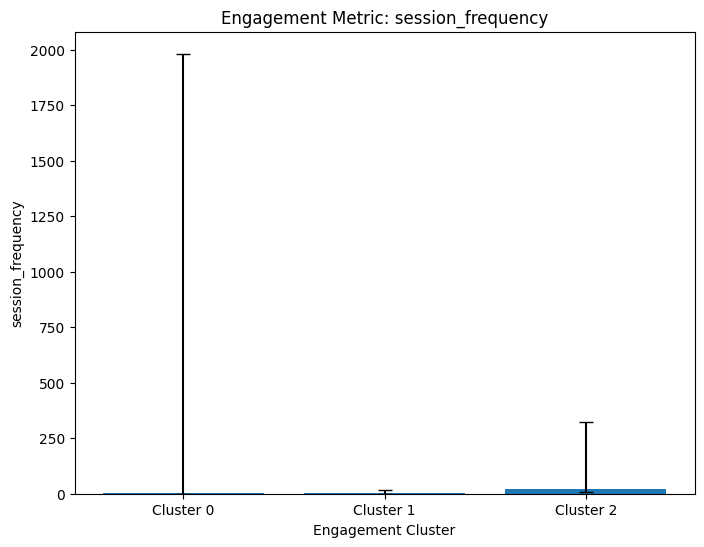

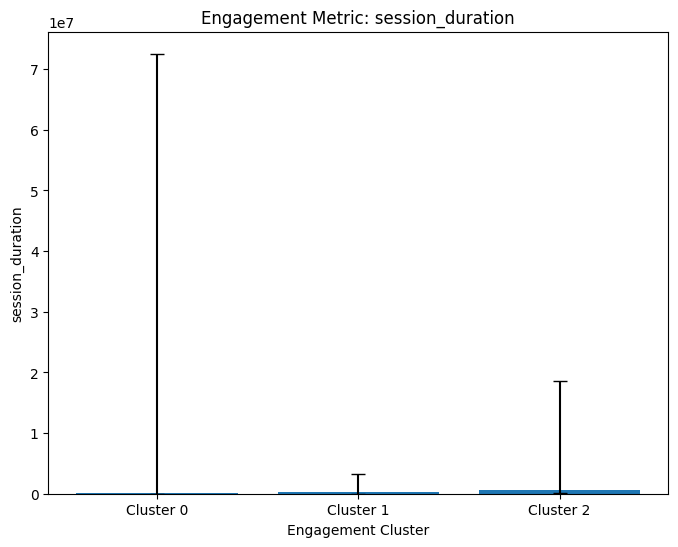

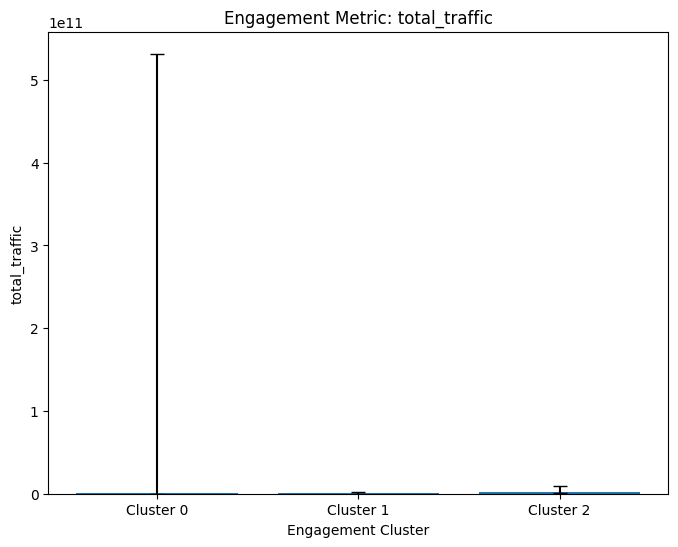

In [52]:
# Plot the metrics for each cluster
for metric in metrics_to_visualize:
    plt.figure(figsize=(8, 6))
    cluster_values = cluster_metrics_non_normalized[metric]
    x_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
    x = range(len(x_labels))
    plt.bar(x, cluster_values['mean'], yerr=[cluster_values['mean'] - cluster_values['min'], cluster_values['max'] - cluster_values['mean']],
            capsize=5)
    plt.xlabel('Engagement Cluster')
    plt.ylabel(metric)
    plt.title(f'Engagement Metric: {metric}')
    plt.xticks(x, x_labels)
    plt.show()

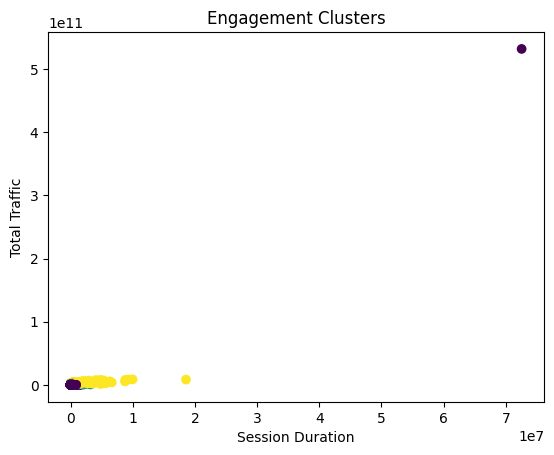

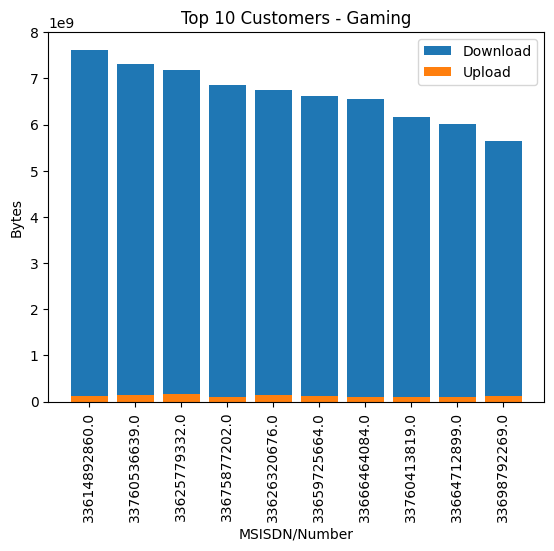

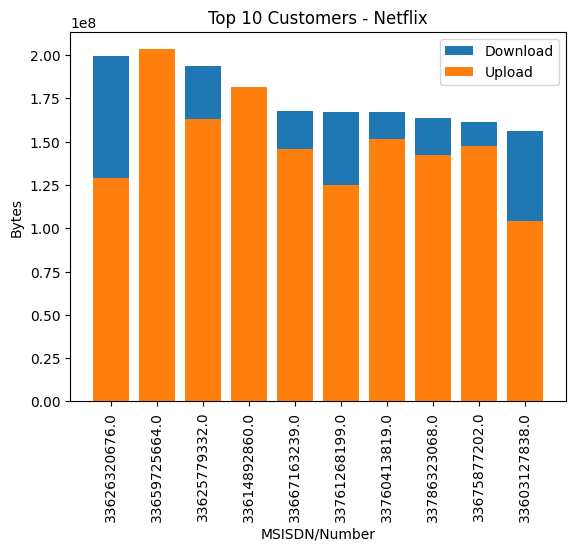

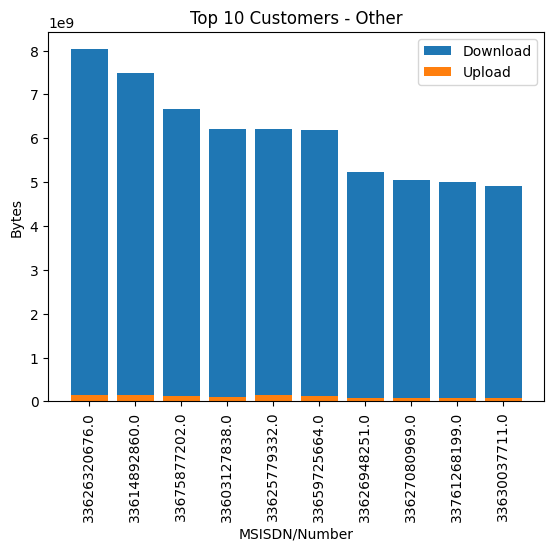

In [53]:
# Plot the engagement clusters
plt.scatter(aggregated_data['session_duration'], aggregated_data['total_traffic'], c=cluster_labels)
plt.xlabel('Session Duration')
plt.ylabel('Total Traffic')
plt.title('Engagement Clusters')
plt.show()

# Plot the top 3 most used applications
top_3_applications = ['Gaming', 'Netflix', 'Other']

for app in top_3_applications:
    plt.figure()  # Create a new figure for each application
    top_10_customers = aggregated_data.sort_values(by=f"{app} DL (Bytes)", ascending=False).head(10)
    x = range(len(top_10_customers))
    plt.bar(x, top_10_customers[f"{app} DL (Bytes)"], label='Download')
    plt.bar(x, top_10_customers[f"{app} UL (Bytes)"], label='Upload')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Bytes')
    plt.title(f'Top 10 Customers - {app}')
    plt.xticks(x, top_10_customers.index, rotation='vertical')
    plt.legend()
    plt.show()

#### Let's see the to 10 Customers

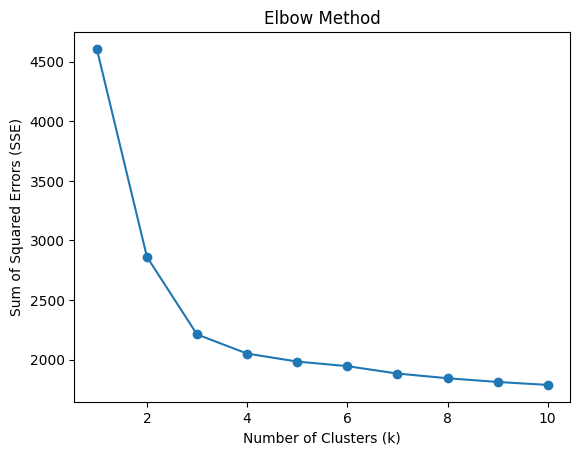

In [54]:
sse = {}
kmax = 10

for k in range(1, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(normalized_data)
    sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

The elbow method shows us the optimal number of clusters(k) for the dataset using the K-means clustering algorithm. The elbow method helps in identifying the value of k that provised the best trade between cluster compact and simplicity.

In this case, the range of k values considered is from 1 to 10. For each value of k, the K-means algorithm is applied to the normalized_data, with a maximum iteration of 1000 and a random state of 42 to ensure reproducibility. The algorithm calculates the sum of squared errors (SSE) for each clustering solution.

The SSE represents the total within-cluster variation, or the sum of squared distances between each data point and its centroid within the assigned cluster. The SSE is a measure of how well the data points are grouped into their respective clusters. Lower SSE values indicate better clustering performance, with data points being closer to their cluster centroids.

The resulting SSE values for each k are stored in a dictionary called "sse."

The next step is to visualize the SSE values using a line plot. The x-axis represents the number of clusters (k), and the y-axis represents the SSE. Each data point on the plot corresponds to a specific value of k, and the points are connected by lines.

To interpret the elbow plot, we look for the "elbow" or "knee" point, which is the value of k where the SSE starts to level off significantly. The elbow point indicates the optimal number of clusters, as it represents the point of diminishing returns in terms of SSE reduction.

In the context of the elbow plot described in the code snippet, the requested description for k=3 would involve analyzing the plot and determining the position of the elbow point when k is equal to 3. The elbow point is typically characterized by a significant change in the slope of the SSE curve. It indicates that adding more clusters beyond that point does not lead to significant improvement in SSE reduction.

K=3

### Total traffic per application and derive the top 10 most engaged users per application

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Aggregate the metrics per customer id (MSISDN) and report the top 10 customers per engagement metric
aggregated_data = dframe.groupby('MSISDN/Number').agg({
    'session_frequency': 'sum',
    'session_duration': 'sum',
    'total_traffic': 'sum',
    'Gaming DL (Bytes)':'sum',
    'Gaming UL (Bytes)':'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})
# Normalize each engagement metric
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(aggregated_data)

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the aggregated data
aggregated_data['Cluster'] = cluster_labels

# Compute the minimum, maximum, average, and total non-normalized metrics for each cluster
metrics_per_cluster = aggregated_data.groupby('Cluster').agg(['min', 'max', 'mean', 'sum'])

# Aggregate user total traffic per application and derive the top 10 most engaged users per application
engaged_users_per_app = {}
top_10_users_per_app = {}
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

for app in applications:
    engaged_users_per_app[app] = aggregated_data[f'{app} DL (Bytes)'] + aggregated_data[f'{app} UL (Bytes)']
    top_10_users_per_app[app] = engaged_users_per_app[app].nlargest(10)

# Print the results
print("Engaged Users per Application:")
print(engaged_users_per_app)
print(50*"*")
print("\nTop 10 Most Engaged Users per Application:")
print(top_10_users_per_app)

Engaged Users per Application:
{'Social Media': MSISDN/Number
3.360100e+10    2232135.0
3.360100e+10    2660565.0
3.360100e+10    3195623.0
3.360101e+10     280294.0
3.360101e+10    2912542.0
                  ...    
3.379000e+10     498569.0
4.188282e+10          0.0
3.197021e+12     715224.0
3.370000e+14     521566.0
8.823971e+14    1546088.0
Length: 106857, dtype: float64, 'Google': MSISDN/Number
3.360100e+10     4389005.0
3.360100e+10     5334863.0
3.360100e+10     3443126.0
3.360101e+10     9678493.0
3.360101e+10    18499616.0
                   ...    
3.379000e+10     5429705.0
4.188282e+10           0.0
3.197021e+12    10438660.0
3.370000e+14     9830617.0
8.823971e+14     9218647.0
Length: 106857, dtype: float64, 'Email': MSISDN/Number
3.360100e+10    1331362.0
3.360100e+10    3307781.0
3.360100e+10    3205380.0
3.360101e+10    2284670.0
3.360101e+10    3305469.0
                  ...    
3.379000e+10    2514097.0
4.188282e+10          0.0
3.197021e+12    1520771.0
3.370000e+

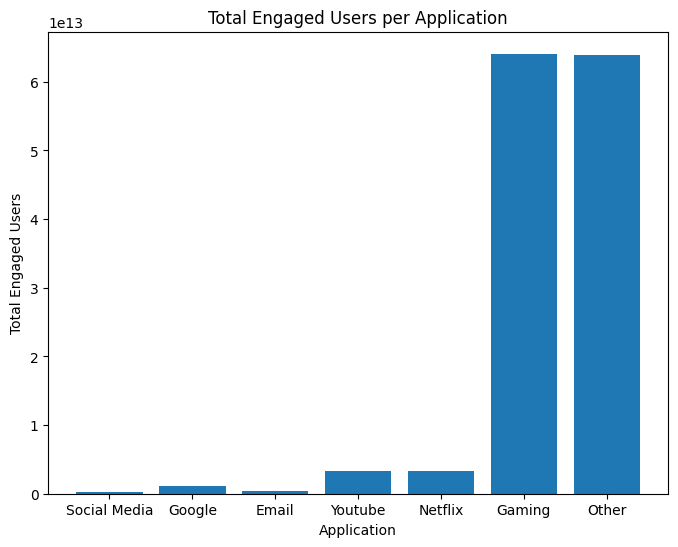

In [57]:
# Calculate the total engaged users per application
total_engaged_users = [engaged_users_per_app[app].sum() for app in applications]

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(applications, total_engaged_users)
plt.xlabel('Application')
plt.ylabel('Total Engaged Users')
plt.title('Total Engaged Users per Application')

# Display the graph
plt.show()

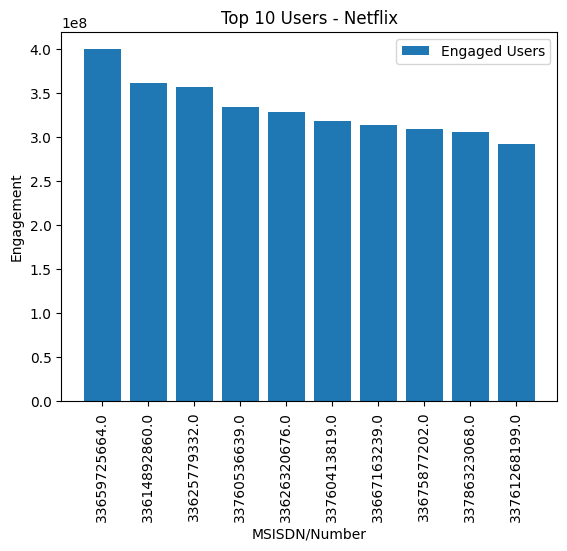

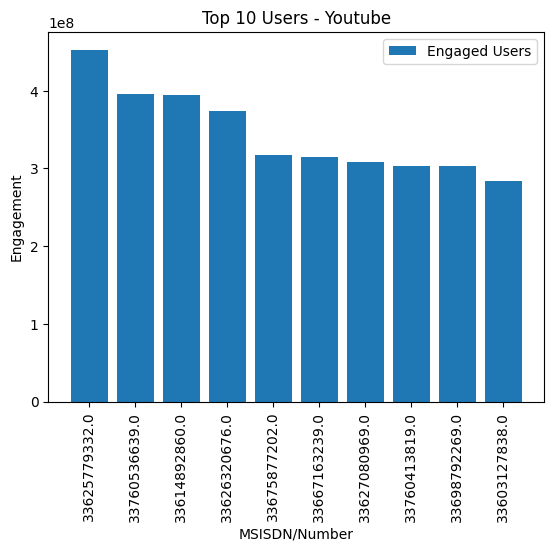

In [58]:
# Plot the top 3 most used applications
top_3_applications = ['Netflix','Youtube']

for app in top_3_applications:
    plt.figure()
    top_10_users = top_10_users_per_app[app]
    x = range(len(top_10_users))
    plt.bar(x, top_10_users, label='Engaged Users')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Engagement')
    plt.title(f'Top 10 Users - {app}')
    plt.xticks(x, top_10_users.index, rotation='vertical')
    plt.legend()
    plt.show()

Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:
• What is the optimized value of k (use the elbow method for this)?
• Interpret your findings.

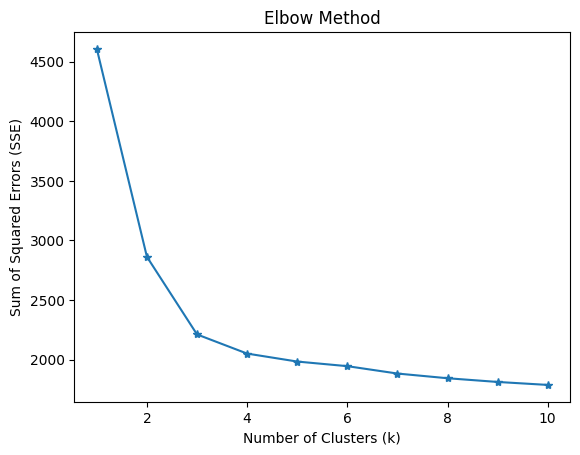

In [60]:
# Using the elbow method to find the optimized value of k
sse = {}
kmax = 10

for k in range(1, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(normalized_data)
    sse[k] = kmeans.inertia_

# Plot the SSE for different values of k
plt.plot(list(sse.keys()), list(sse.values()),marker='*')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

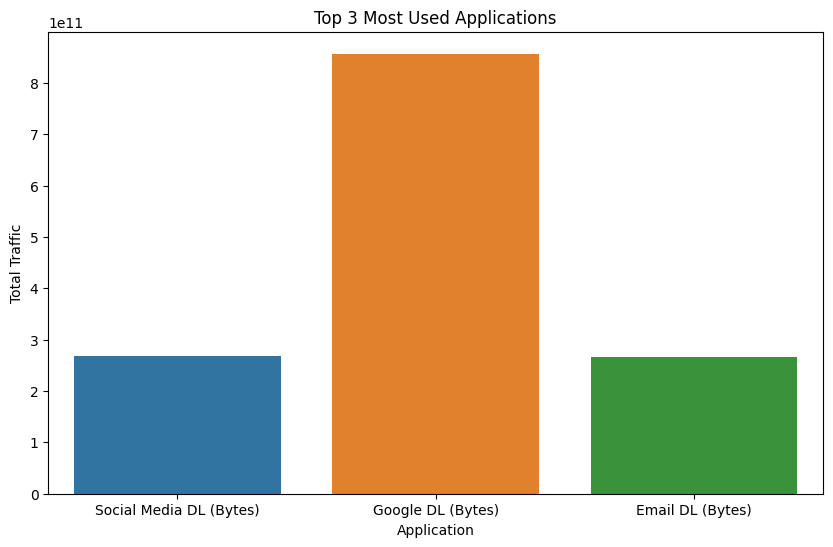

In [61]:
# Calculate the total traffic for each application
app_traffic = aggregated_data.sum().loc[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)']]

# Plot the top 3 most used applications
plt.figure(figsize=(10, 6))
sns.barplot(x=app_traffic.index, y=app_traffic.values)
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.title('Top 3 Most Used Applications')
plt.show()

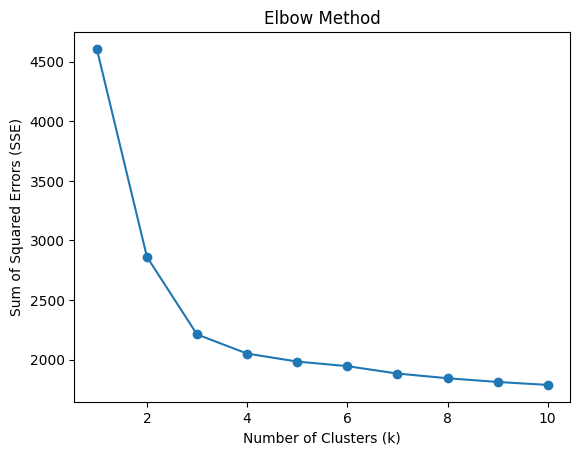

In [62]:
from sklearn.cluster import KMeans

# Define the range of k values to test
k_values = range(1, 11)

# Calculate the SSE for different values of k
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)  # Assuming you have normalized data
    sse.append(kmeans.inertia_)

# Plot the SSE values against k
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

In [63]:
model = KMeans(n_clusters = 3,
               max_iter = 1000)

In [64]:
m1 = aggregated_data

In [65]:
# The lowest SSE value
kmeans.inertia_

1787.1271447805693

In [66]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[3.65402951e-06, 1.32881007e-03, 8.64294436e-04, 5.45202940e-02,
        5.42878980e-02, 4.17263454e-02, 5.20968350e-02, 4.93442647e-02,
        2.59990001e-02, 5.31628308e-02, 5.20087136e-02, 4.93434233e-02,
        5.13252325e-02, 7.88683993e-02, 5.51472707e-02, 5.25419678e-02,
        5.48522661e-02],
       [7.99256152e-03, 6.35307287e-03, 3.74484586e-03, 2.25996420e-01,
        2.17482436e-01, 1.71423153e-01, 2.12527307e-01, 2.03818420e-01,
        2.34195993e-01, 2.18203476e-01, 2.12514715e-01, 2.01809919e-01,
        2.09420065e-01, 2.39131196e-01, 2.20025073e-01, 2.13756842e-01,
        2.21770611e-01],
       [4.07309103e-03, 4.57231102e-03, 2.74660341e-03, 1.66773268e-01,
        1.61006646e-01, 1.25943248e-01, 1.56383995e-01, 1.49100622e-01,
        1.71841578e-01, 1.60820813e-01, 1.57081704e-01, 1.47599006e-01,
        1.53833658e-01, 1.76894326e-01, 1.63323119e-01, 1.60085343e-01,
        1.64011888e-01],
       [5.10171465e-02, 4.87243302e-02, 9.27106406e-03, 5.545

In [67]:
# The number of iterations required to converge
kmeans.n_iter_

56

In [68]:
kmeans.labels_[:10]

array([0, 4, 0, 4, 6, 5, 5, 4, 9, 0])

In [69]:
cluster

2

In [70]:
from sklearn.cluster import KMeans


# Instantiate k-means algorithm
kmeans = KMeans(n_clusters=2)

# Fit the algorithm to the features
kmeans.fit(m1)

# Get the cluster labels
labels = kmeans.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [71]:
len(labels)

106857

In [72]:
centroids = np.array(cluster)
centroids

array(2)

In [73]:
# Reset the index of normalized_data
m1.reset_index(drop=True, inplace=True)

# Assign the cluster labels to the 'Class' column
m1['Class'] = labels

# Print the updated DataFrame
print(m1)

        session_frequency  session_duration  total_traffic  Gaming DL (Bytes)  \
0                1.000000      1.167200e+05   8.786906e+08       8.110911e+08   
1                1.000000      1.812300e+05   1.568596e+08       1.050353e+08   
2                1.000000      1.349690e+05   5.959665e+08       5.290685e+08   
3                1.000000      4.987800e+04   4.223207e+08       3.880748e+08   
4                4.000000      3.710400e+04   1.457411e+09       1.308981e+09   
...                   ...               ...            ...                ...   
106852           1.000000      1.409880e+05   4.803073e+08       4.276202e+08   
106853        1982.659079      7.255100e+07   5.317447e+11       0.000000e+00   
106854           1.000000      8.773850e+05   2.321240e+08       1.645636e+08   
106855           1.000000      2.530300e+05   5.962878e+08       5.012590e+08   
106856           1.000000      8.698440e+05   1.391536e+08       2.809228e+07   

        Gaming UL (Bytes)  

In [74]:
m1['Class'] = labels

In [75]:

m1

,session_frequency,session_duration,total_traffic,Gaming DL (Bytes),Gaming UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Other DL (Bytes),Other UL (Bytes),Cluster,Class
0,1.000000,1.167200e+05,8.786906e+08,8.110911e+08,1367528.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,377096990.0,9473882.0,0,0
1,1.000000,1.812300e+05,1.568596e+08,1.050353e+08,14714780.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,279557701.0,2152370.0,0,0
2,1.000000,1.349690e+05,5.959665e+08,5.290685e+08,9759228.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,495086501.0,6607171.0,0,0
3,1.000000,4.987800e+04,4.223207e+08,3.880748e+08,3051292.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,25248001.0,10031701.0,0,0
4,4.000000,3.710400e+04,1.457411e+09,1.308981e+09,5816727.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,777643713.0,27160771.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106852,1.000000,1.409880e+05,4.803073e+08,4.276202e+08,9383076.0,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,204636073.0,6479040.0,0,0
106853,1982.659079,7.255100e+07,5.317447e+11,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
106854,1.000000,8.773850e+05,2.321240e+08,1.645636e+08,13485133.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,467678100.0,2848373.0,0,0
106855,1.000000,2.530300e+05,5.962878e+08,5.012590e+08,8883653.0,496337.0,25229.0,8215537.0,1615080.0,2989663.0,328919.0,16690728.0,20044212.0,9983678.0,20921364.0,144354057.0,4834382.0,0,0


In [76]:
# Finding the cluster centroids
centroids = kmeans.cluster_centers_

In [77]:
centroids

array([[2.59232051e+00, 1.46167156e+05, 6.90962103e+08, 5.88215753e+08,
        1.15532580e+07, 2.50208080e+06, 4.58860128e+04, 8.01649604e+06,
        2.86593838e+06, 2.49735227e+06, 6.51443543e+05, 1.62146054e+07,
        1.53437939e+07, 1.62063937e+07, 1.53319386e+07, 5.86991600e+08,
        1.15171640e+07, 3.02828105e-01],
       [1.98265908e+03, 7.25510046e+07, 5.31744709e+11, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In K-means clustering, the algorithm aims to partition the data into a specified number of clusters (K) by iteratively optimizing the positions of the centroids. Initially, the centroids are randomly assigned, and then the algorithm updates the centroids by calculating the mean of the data points assigned to each cluster. This process continues until the centroids stabilize, and the clusters are formed.

The centroid coordinates are typically represented as a vector or an array of values, where each value corresponds to a feature or attribute of the data. These values indicate the central tendencies of the data points within the cluster for each attribute.

In [79]:
from sklearn.cluster import KMeans
model.fit(m1)

KMeans(max_iter=1000, n_clusters=3)

In [80]:
cluster = model.cluster_centers_

In [81]:
centroids

array([[2.59232051e+00, 1.46167156e+05, 6.90962103e+08, 5.88215753e+08,
        1.15532580e+07, 2.50208080e+06, 4.58860128e+04, 8.01649604e+06,
        2.86593838e+06, 2.49735227e+06, 6.51443543e+05, 1.62146054e+07,
        1.53437939e+07, 1.62063937e+07, 1.53319386e+07, 5.86991600e+08,
        1.15171640e+07, 3.02828105e-01],
       [1.98265908e+03, 7.25510046e+07, 5.31744709e+11, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [82]:
labels = model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [83]:

len(labels)

106857

In [84]:
centroids = np.array(cluster)

In [85]:
centroids

array([[ 1.43561595e+00,  1.15691304e+05,  5.31878067e+08,
         4.47773032e+08,  9.46929653e+06,  2.05285730e+06,
         3.75127755e+04,  6.55704416e+06,  2.34478969e+06,
         2.04666871e+06,  5.33339197e+05,  1.32578924e+07,
         1.25654986e+07,  1.32517166e+07,  1.25526339e+07,
         4.68013074e+08,  9.43578447e+06,  1.30857010e-01,
        -1.09606063e-18],
       [ 1.98265908e+03,  7.25510046e+07,  5.31744709e+11,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 8.76793024e+00,  3.08876789e+05,  1.54030684e+09,
         1.33803508e+09,  2.26794637e+07,  4.90047117e+06,
         9.05904668e+04,  1.58084643e+07,  5.64833502e+06,
         4.90353781e+06,  1.28199898e+06,  3.20004045e+07,
    

In [86]:
m1

,session_frequency,session_duration,total_traffic,Gaming DL (Bytes),Gaming UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Other DL (Bytes),Other UL (Bytes),Cluster,Class
0,1.000000,1.167200e+05,8.786906e+08,8.110911e+08,1367528.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,377096990.0,9473882.0,0,0
1,1.000000,1.812300e+05,1.568596e+08,1.050353e+08,14714780.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,279557701.0,2152370.0,0,0
2,1.000000,1.349690e+05,5.959665e+08,5.290685e+08,9759228.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,495086501.0,6607171.0,0,0
3,1.000000,4.987800e+04,4.223207e+08,3.880748e+08,3051292.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,25248001.0,10031701.0,0,0
4,4.000000,3.710400e+04,1.457411e+09,1.308981e+09,5816727.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,777643713.0,27160771.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106852,1.000000,1.409880e+05,4.803073e+08,4.276202e+08,9383076.0,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,204636073.0,6479040.0,0,0
106853,1982.659079,7.255100e+07,5.317447e+11,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
106854,1.000000,8.773850e+05,2.321240e+08,1.645636e+08,13485133.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,467678100.0,2848373.0,0,0
106855,1.000000,2.530300e+05,5.962878e+08,5.012590e+08,8883653.0,496337.0,25229.0,8215537.0,1615080.0,2989663.0,328919.0,16690728.0,20044212.0,9983678.0,20921364.0,144354057.0,4834382.0,0,0


In [87]:
centroids[:,0]

array([1.43561595e+00, 1.98265908e+03, 8.76793024e+00])

In [88]:
centroids[:,1]

array([  115691.3035367 , 72551004.56034666,   308876.78881177])

In [89]:
centroids[:,2]

array([5.31878067e+08, 5.31744709e+11, 1.54030684e+09])

In [90]:
m1.columns

Index(['session_frequency', 'session_duration', 'total_traffic',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Other DL (Bytes)', 'Other UL (Bytes)', 'Cluster', 'Class'],
      dtype='object')

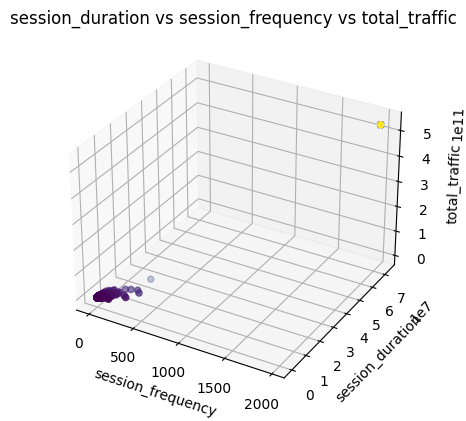

In [91]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3, max_iter=1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
aggregated_data['Class'] = labels
m1['Class'] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(m1['session_frequency'])
y = np.array(m1['session_duration'])
z = np.array(m1['total_traffic'])

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='b')
ax.scatter(x, y, z, c=y)

plt.title('session_duration vs session_frequency vs total_traffic')
ax.set_xlabel('session_frequency')
ax.set_ylabel('session_duration')
ax.set_zlabel('total_traffic')
plt.show()

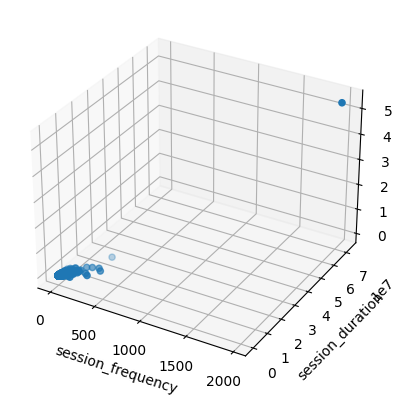

In [92]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =m1['session_frequency']
y =m1['session_duration']
z =m1['total_traffic']

ax.scatter(x, y, z)
ax.set_xlabel('session_frequency')
ax.set_ylabel('session_duration')
ax.set_zlabel('total_traffic')

plt.show()

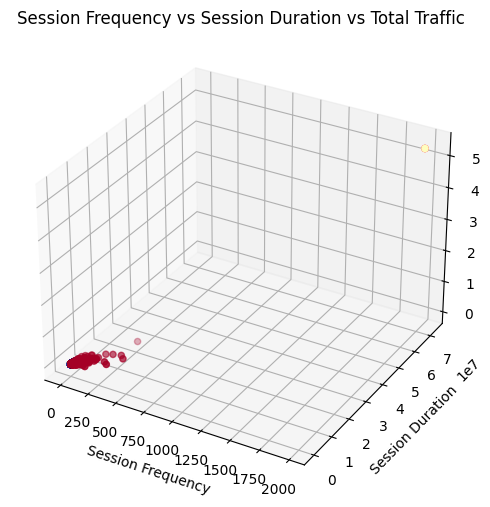

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Assuming you have the aggregated_data DataFrame

model = KMeans(n_clusters=3, max_iter=1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
m1['Class'] = labels

x = np.array(m1['session_frequency'])
y = np.array(m1['session_duration'])
z = np.array(m1['total_traffic'])
colors = labels

fig = plt.figure(figsize=[15, 6])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='r')
ax.scatter(x, y, z, c=colors, cmap='RdYlBu_r')
ax.set_xlabel('Session Frequency')
ax.set_ylabel('Session Duration')
ax.set_zlabel('Total Traffic')
plt.title('Session Frequency vs Session Duration vs Total Traffic')
plt.show()

In [94]:
m1['Class']

0         0
1         0
2         0
3         0
4         2
         ..
106852    0
106853    1
106854    0
106855    0
106856    0
Name: Class, Length: 106857, dtype: int32

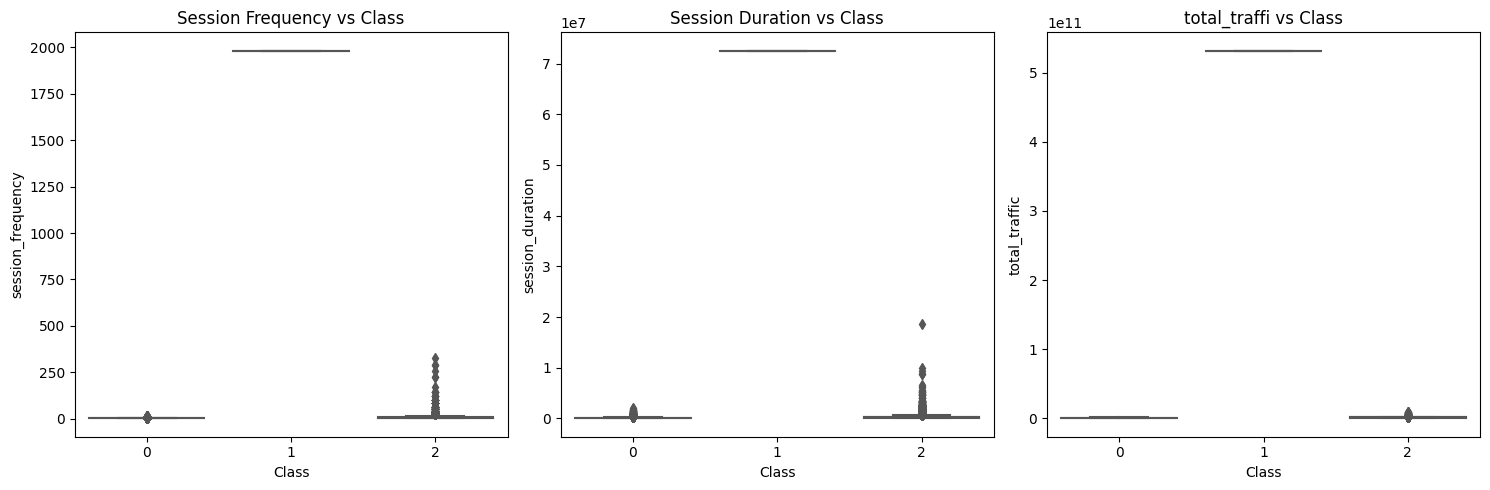

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Class', y='session_frequency', data=m1, color='#FF781F')
plt.title('Session Frequency vs Class')

plt.subplot(1, 3, 2)
sns.boxplot(x='Class', y='session_duration', data=m1, color='#FF781F')
plt.title('Session Duration vs Class')

plt.subplot(1, 3, 3)
sns.boxplot(x='Class', y='total_traffic', data=m1, color='#FF781F')
plt.title('total_traffi vs Class')

plt.tight_layout()
plt.show()

"Class 0" represent a group of high-engagement customers, "Class 1" crepresent medium-engagement customers, and "Class 2" represent low-engagement customers.

this code generates a visual representation of the distribution of the variables 'session_frequency', 'session_duration', and 'total_traffic' grouped by the 'Class' variable. It allows for easy comparison and analysis of the distributions across different classes.

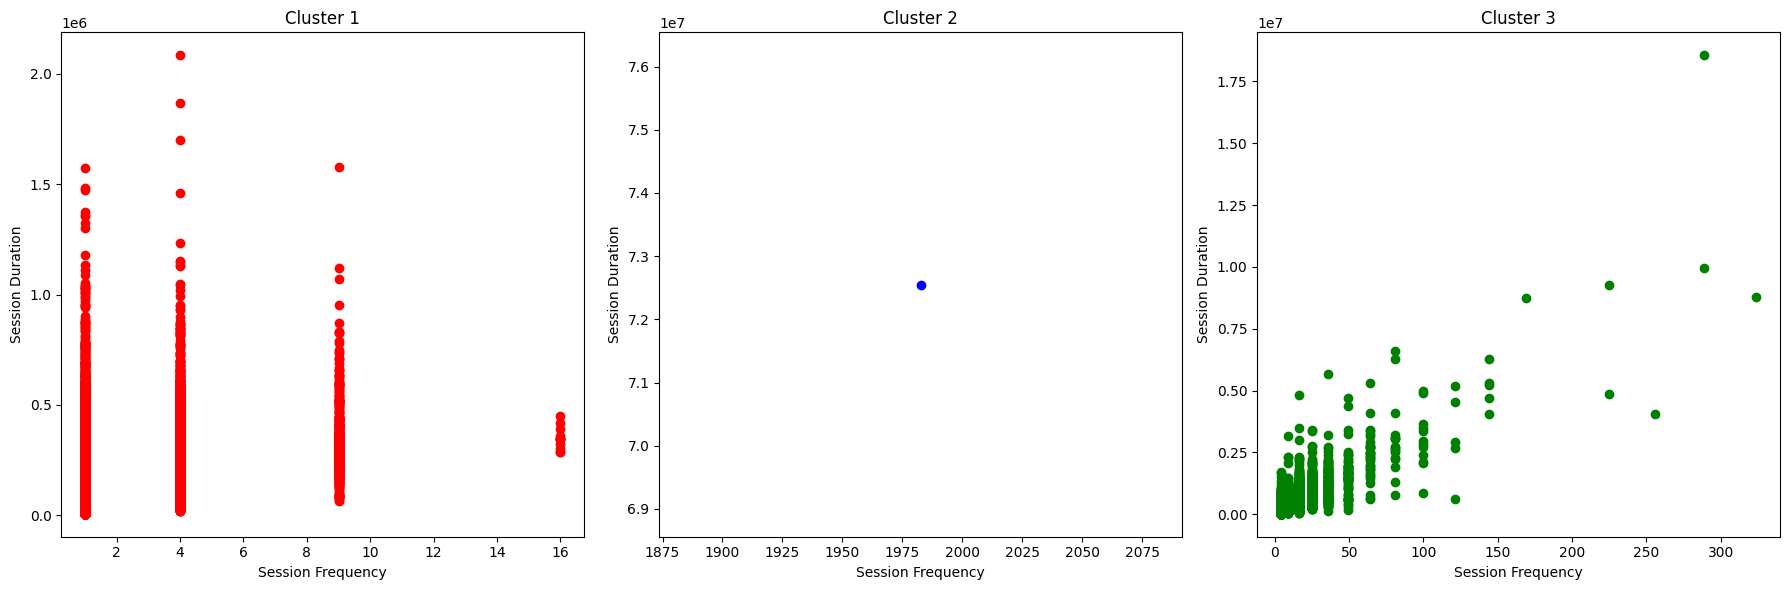

In [97]:
# Filter data for each cluster
cluster1_data = m1[m1['Class'] == 0]
cluster2_data = m1[m1['Class'] == 1]
cluster3_data = m1[m1['Class'] == 2]

# Create separate plots for each cluster
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for Cluster 1
ax[0].scatter(cluster1_data['session_frequency'], cluster1_data['session_duration'], color='red')
ax[0].set_xlabel('Session Frequency')
ax[0].set_ylabel('Session Duration')
ax[0].set_title('Cluster 1')

# Plot for Cluster 2
ax[1].scatter(cluster2_data['session_frequency'], cluster2_data['session_duration'], color='blue')
ax[1].set_xlabel('Session Frequency')
ax[1].set_ylabel('Session Duration')
ax[1].set_title('Cluster 2')

# Plot for Cluster 3
ax[2].scatter(cluster3_data['session_frequency'], cluster3_data['session_duration'], color='green')
ax[2].set_xlabel('Session Frequency')
ax[2].set_ylabel('Session Duration')
ax[2].set_title('Cluster 3')

plt.tight_layout()
plt.show()

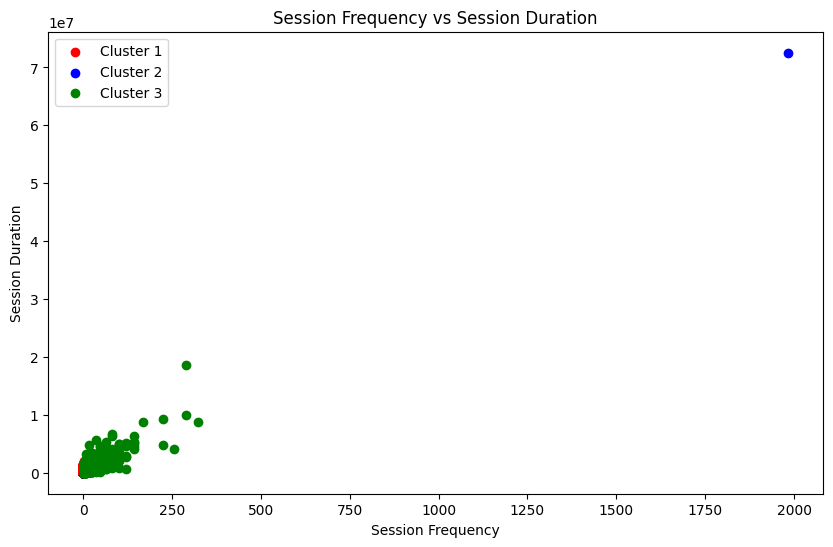

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points for each cluster
ax.scatter(cluster1_data['session_frequency'], cluster1_data['session_duration'], color='red', label='Cluster 1')
ax.scatter(cluster2_data['session_frequency'], cluster2_data['session_duration'], color='blue', label='Cluster 2')
ax.scatter(cluster3_data['session_frequency'], cluster3_data['session_duration'], color='green', label='Cluster 3')

ax.set_xlabel('Session Frequency')
ax.set_ylabel('Session Duration')
ax.set_title('Session Frequency vs Session Duration')
ax.legend()

plt.show()